### CO

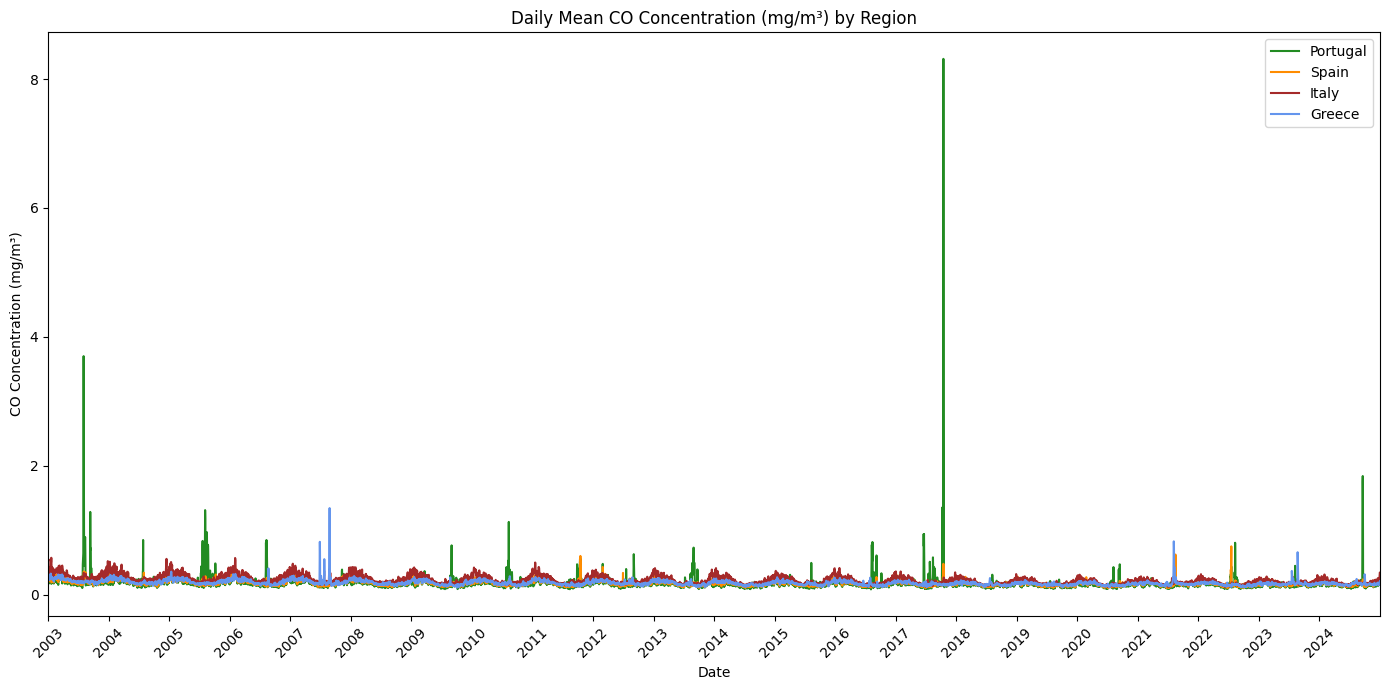

In [1]:
# Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
co_file = r"D:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load CO data and stack time ===
ds = xr.open_dataset(co_file)
co = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(co.sizes["time"]):
    y = int(co["Year"].values[i])
    m = int(co["Month"].values[i])
    d = int(co["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
co = co.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = co.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean CO Concentration (mg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("CO Concentration (mg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


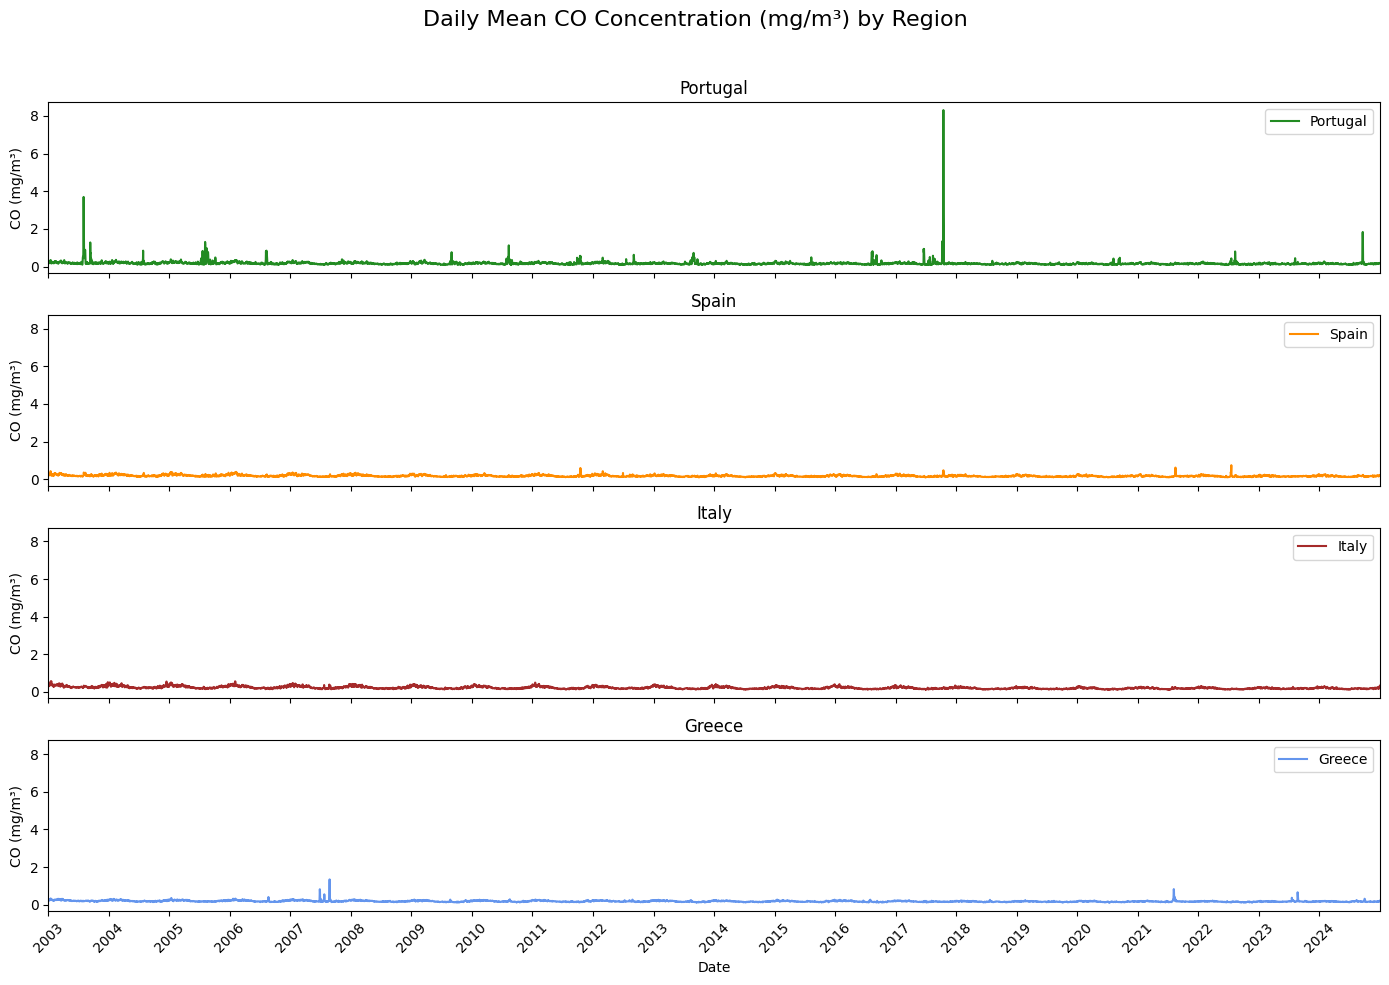

In [2]:
#Time series with daily averages by region separated

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
co_file = r"D:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load CO data and stack time ===
ds = xr.open_dataset(co_file)
co = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(co.sizes["time"]):
    y = int(co["Year"].values[i])
    m = int(co["Month"].values[i])
    d = int(co["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
co = co.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = co.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("CO (mg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean CO Concentration (mg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()



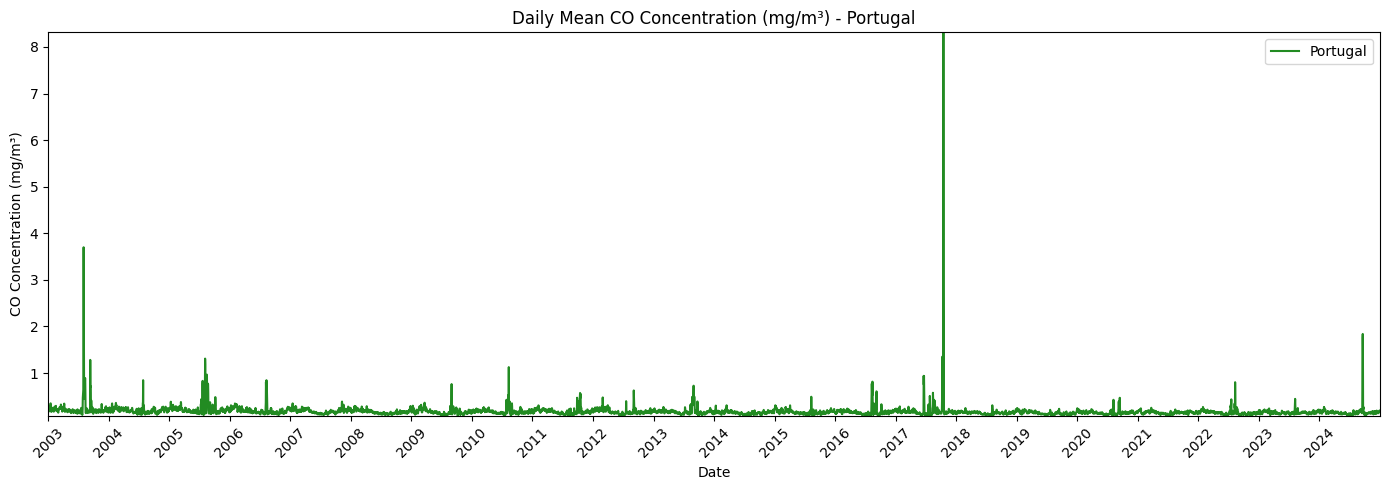

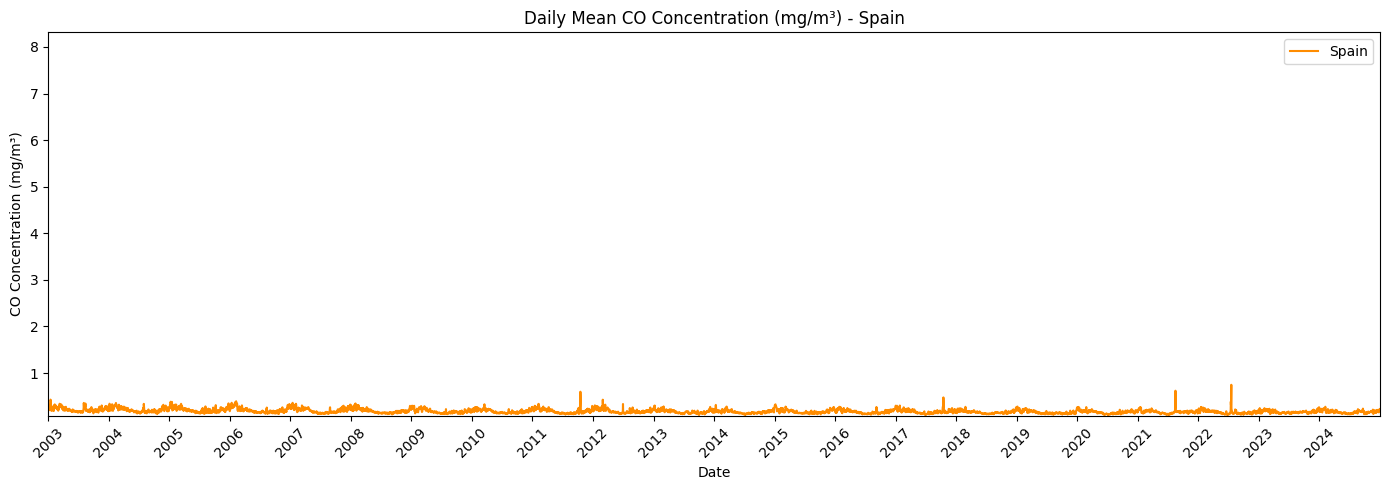

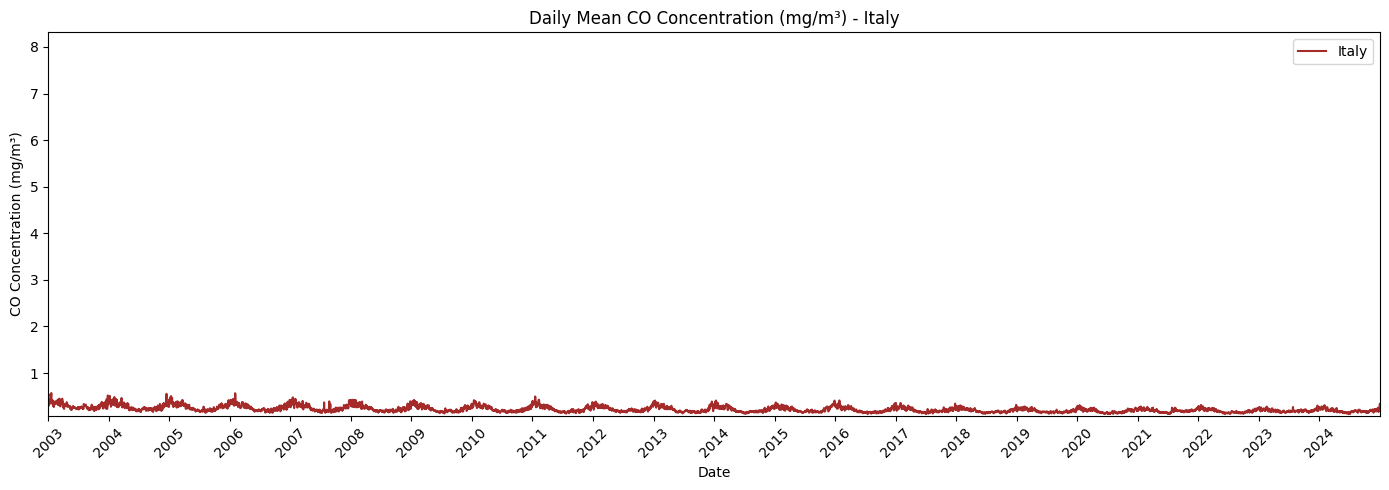

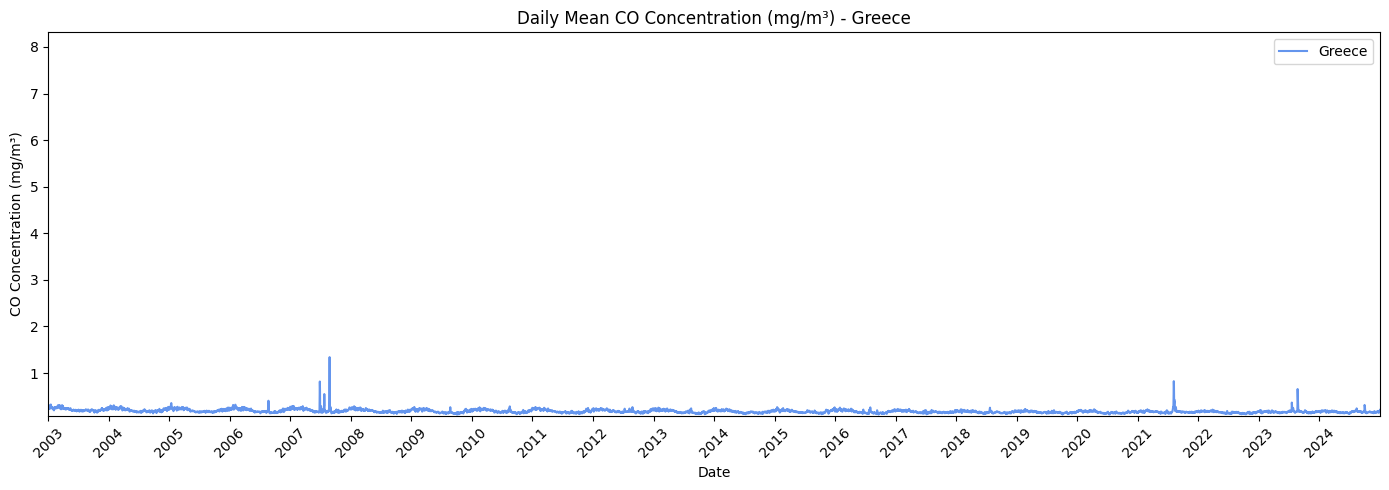

In [3]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
co_file = r"D:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load CO data and stack time ===
ds = xr.open_dataset(co_file)
co = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(co.sizes["time"]):
    y = int(co["Year"].values[i])
    m = int(co["Month"].values[i])
    d = int(co["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
co = co.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = co.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean CO Concentration (mg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("CO Concentration (mg/m³)")
    plt.ylim(ymin, ymax)  # Keep the same y-axis across all figures
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


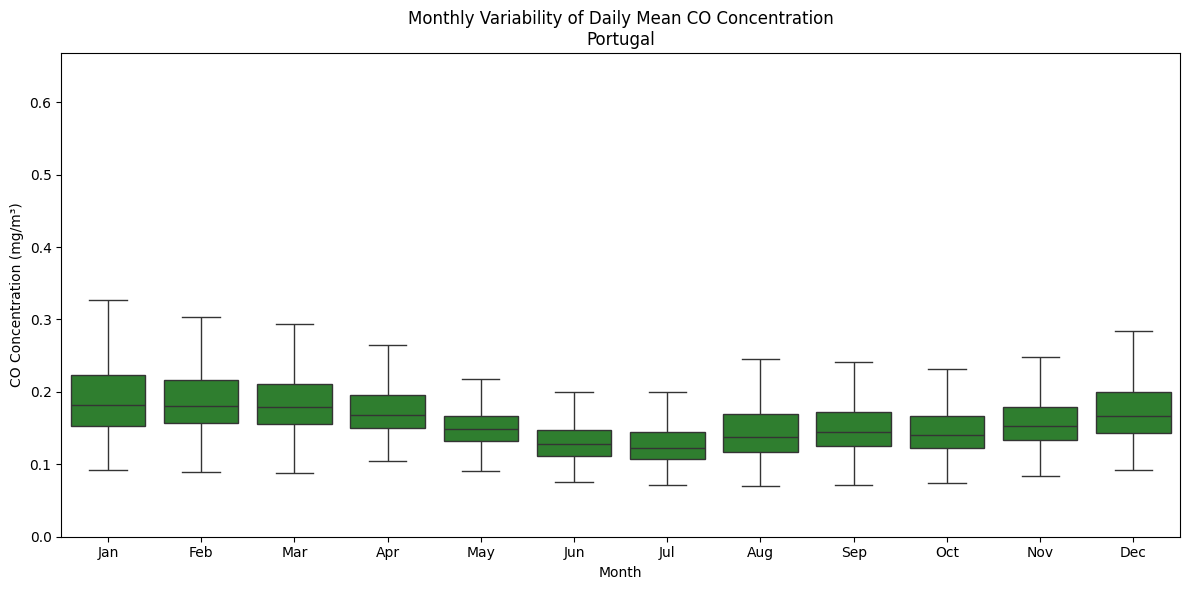

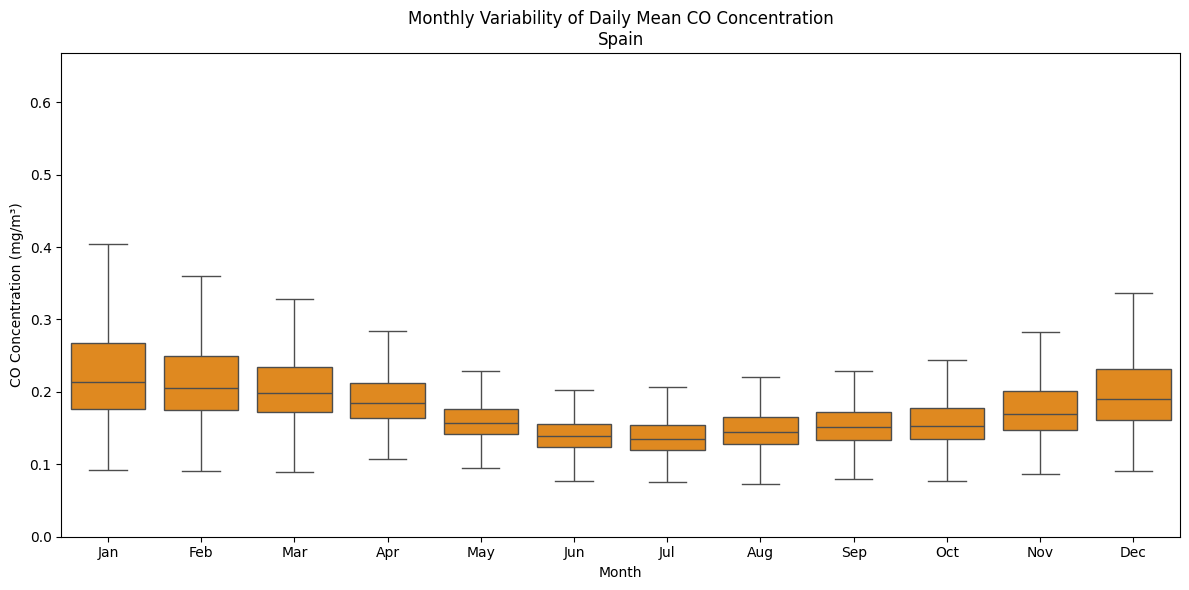

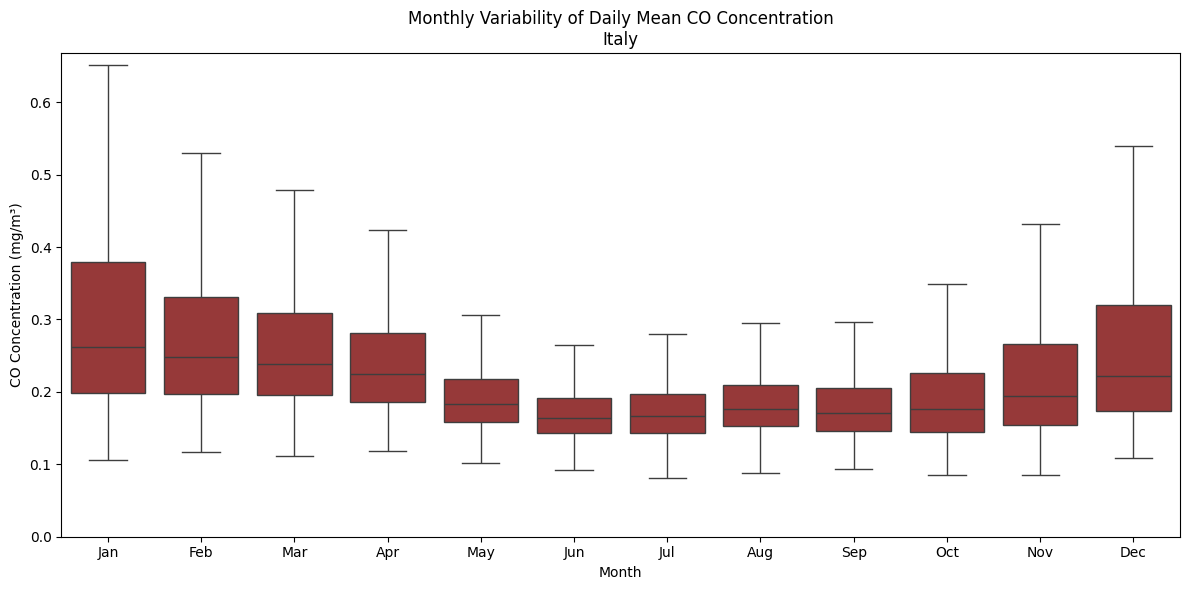

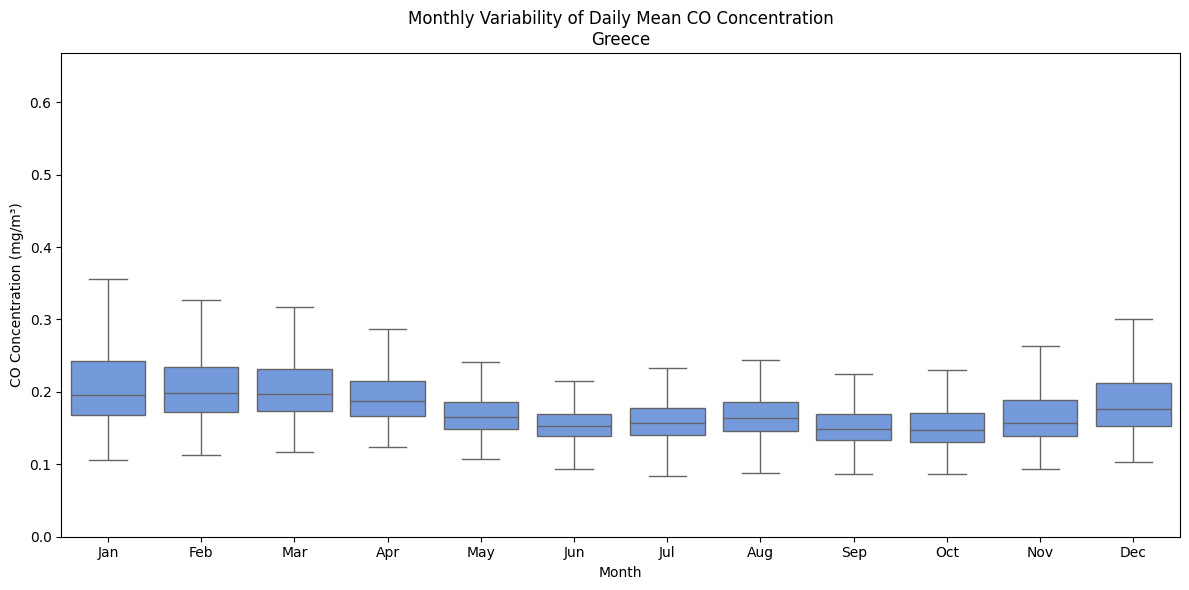

In [4]:
#Boxplot variability by month for every year with same y axis

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
co_file = r"D:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

ds = xr.open_dataset(co_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: calculate global Y-axis limits ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    co = ds["Mean"].where(mask)
    co_stack = co.stack(space=("latitude", "longitude"))

    for month in range(1, 13):
        values = co_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_values.extend(values)

y_min = 0
y_max = np.percentile(all_values, 99.5) * 1.1  # avoid extreme outliers

# === Second pass: plot each region ===
for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    co = ds["Mean"].where(mask)
    co_stack = co.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        values = co_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5, color=colors[region])
    plt.ylim(y_min, y_max)
    plt.title(f"Monthly Variability of Daily Mean CO Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("CO Concentration (mg/m³)")
    plt.tight_layout()
    plt.show()

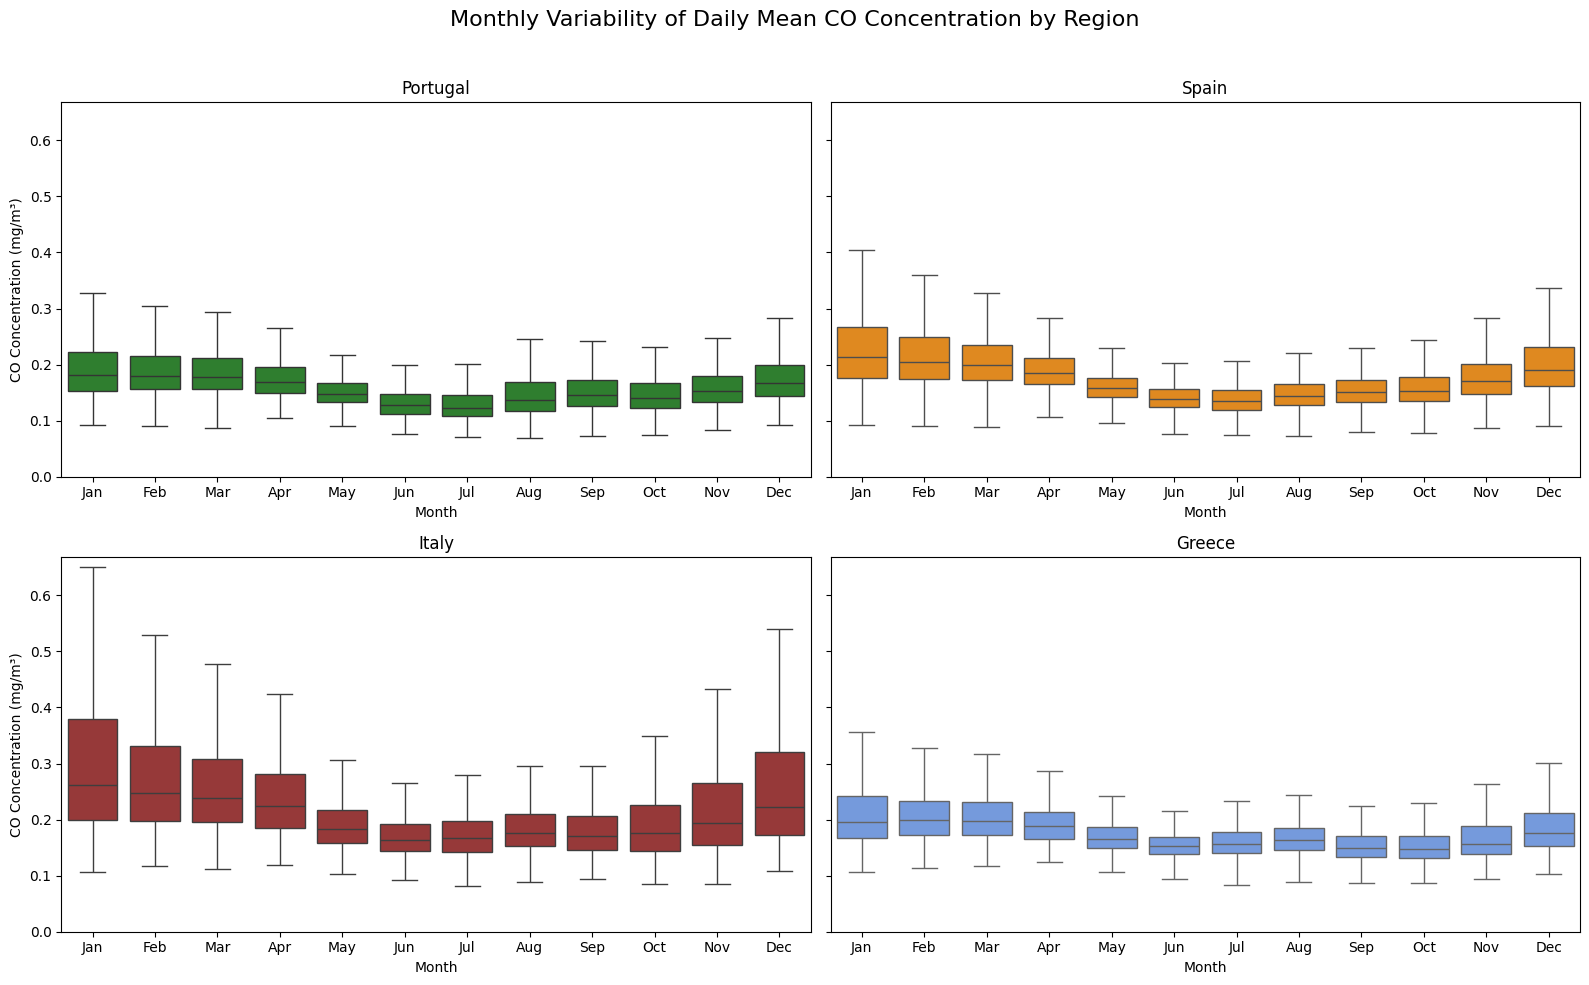

In [5]:
#Boxplot with same y axis all together

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
co_file = r"D:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors ===
colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

# === Load CO dataset ===
ds = xr.open_dataset(co_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Prepare all data and find global Y range ===
region_data = {}
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    co = ds["Mean"].where(mask)
    co_stack = co.stack(space=("latitude", "longitude"))

    region_monthly = []

    for month in range(1, 13):
        values = co_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        region_monthly.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values,
            "Region": [region] * len(values)
        }))
        all_values.extend(values)

    region_data[region] = pd.concat(region_monthly, ignore_index=True)

# === Global Y limits for shared axis ===
y_min = 0
y_max = np.percentile(all_values, 99.5) * 1.1  # avoid extreme outliers

# === Plotting ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, (region, df) in enumerate(region_data.items()):
    ax = axes[i]
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region], ax=ax)
    ax.set_title(region)
    ax.set_xlabel("Month")
    ax.set_ylabel("CO Concentration (mg/m³)")
    ax.set_ylim(y_min, y_max)

plt.suptitle("Monthly Variability of Daily Mean CO Concentration by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [6]:
#Exceedances

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
co_file = r"D:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(co_file)

threshold = 4.0  # mg/m³

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    co = ds["Mean"].where(mask)

    # Calculate spatial average daily mean CO
    regional_mean = co.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="CO_mean").reset_index()
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["CO_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove4")
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove4").fillna(0).astype(int)
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean CO concentration exceeds 4 mg/m³:\n")
print(table)




Number of days per year where daily mean CO concentration exceeds 4 mg/m³:

Region  Portugal
Year            
2017           1
Total          1


### NO2

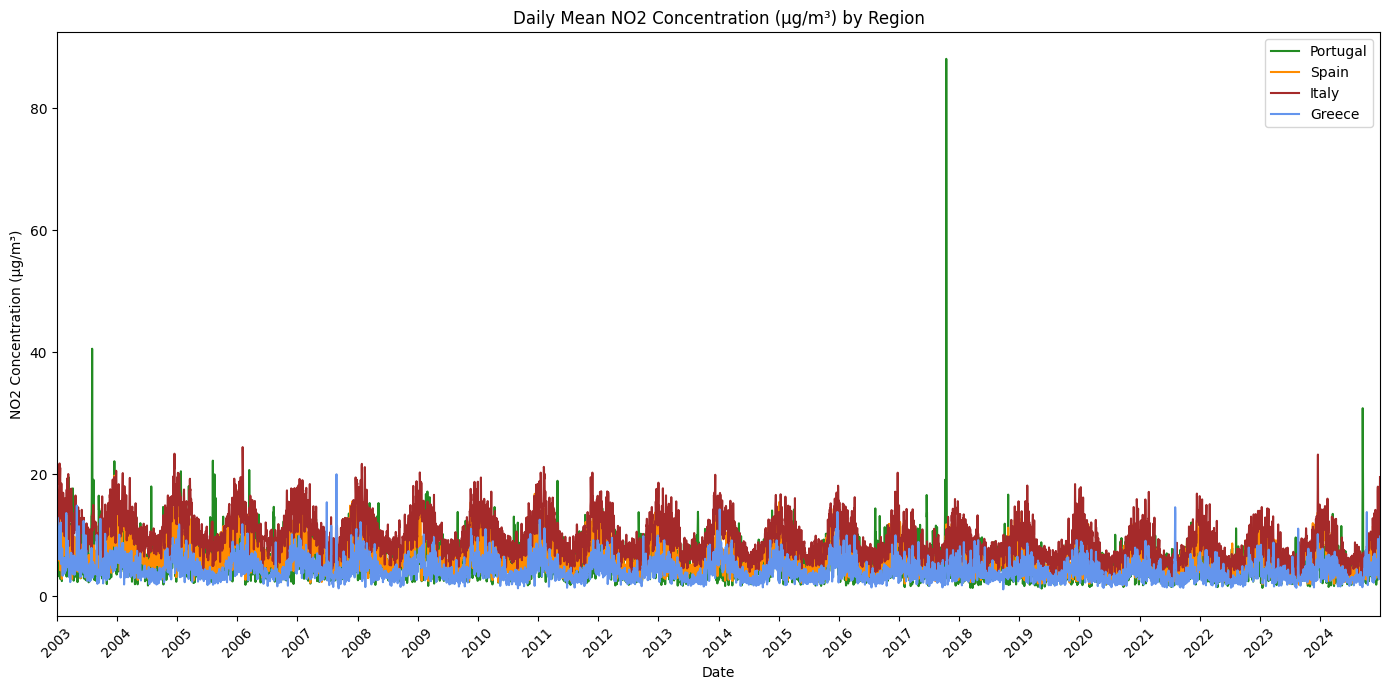

In [7]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no2_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO2 data and stack time ===
ds = xr.open_dataset(no2_file)
no2 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no2.sizes["time"]):
    y = int(no2["Year"].values[i])
    m = int(no2["Month"].values[i])
    d = int(no2["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no2 = no2.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no2.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean NO2 Concentration (µg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


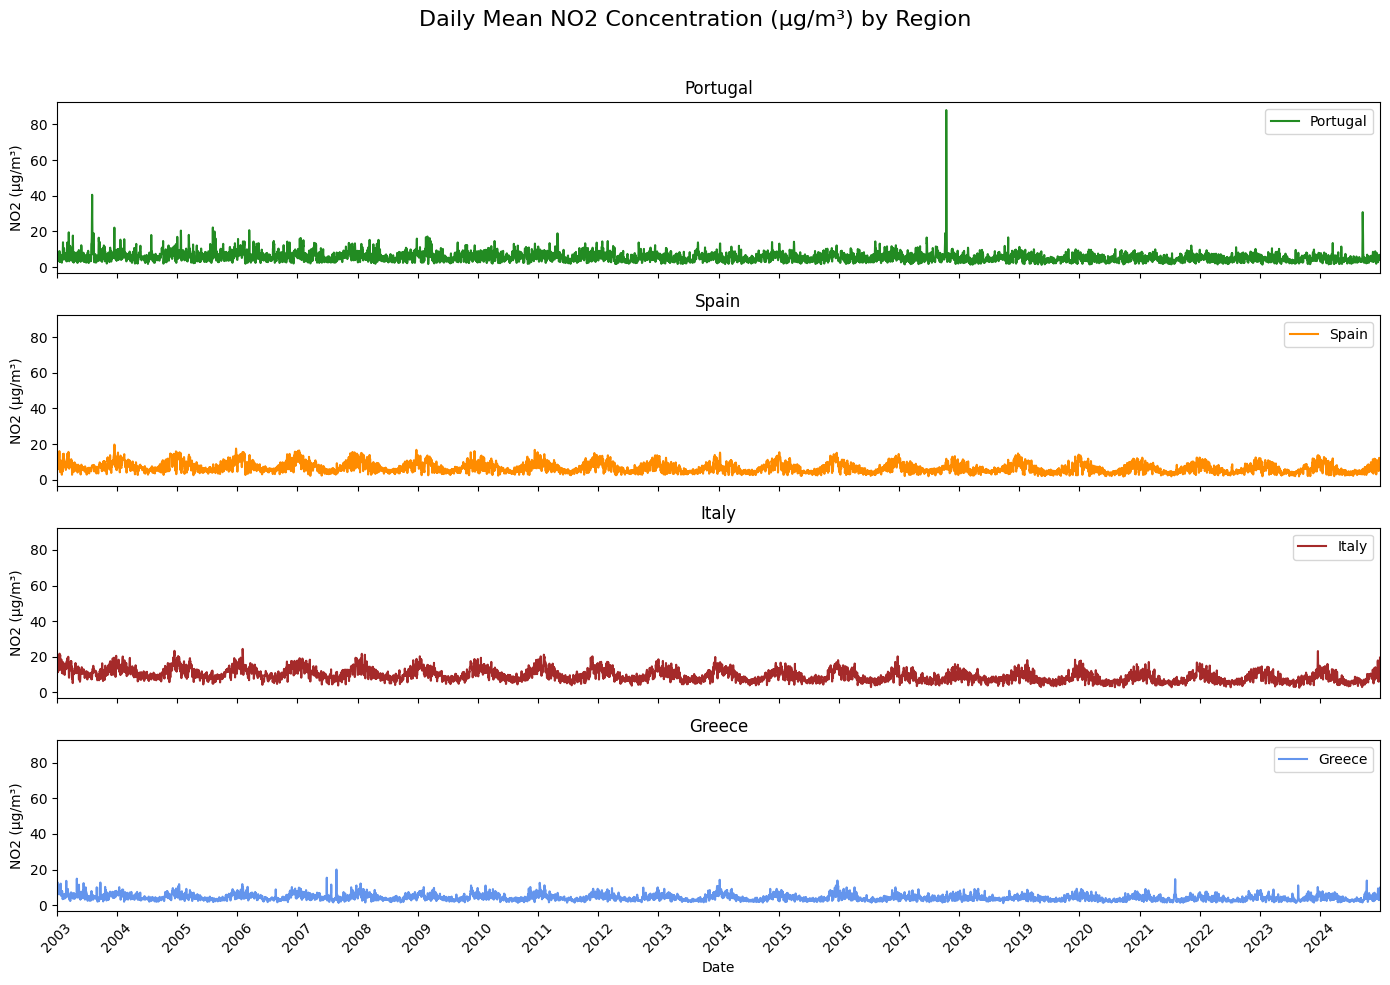

In [8]:
#Time series with daily averages by region separated

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no2_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO2 data and stack time ===
ds = xr.open_dataset(no2_file)
no2 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no2.sizes["time"]):
    y = int(no2["Year"].values[i])
    m = int(no2["Month"].values[i])
    d = int(no2["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no2 = no2.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no2.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("NO2 (µg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean NO2 Concentration (µg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()



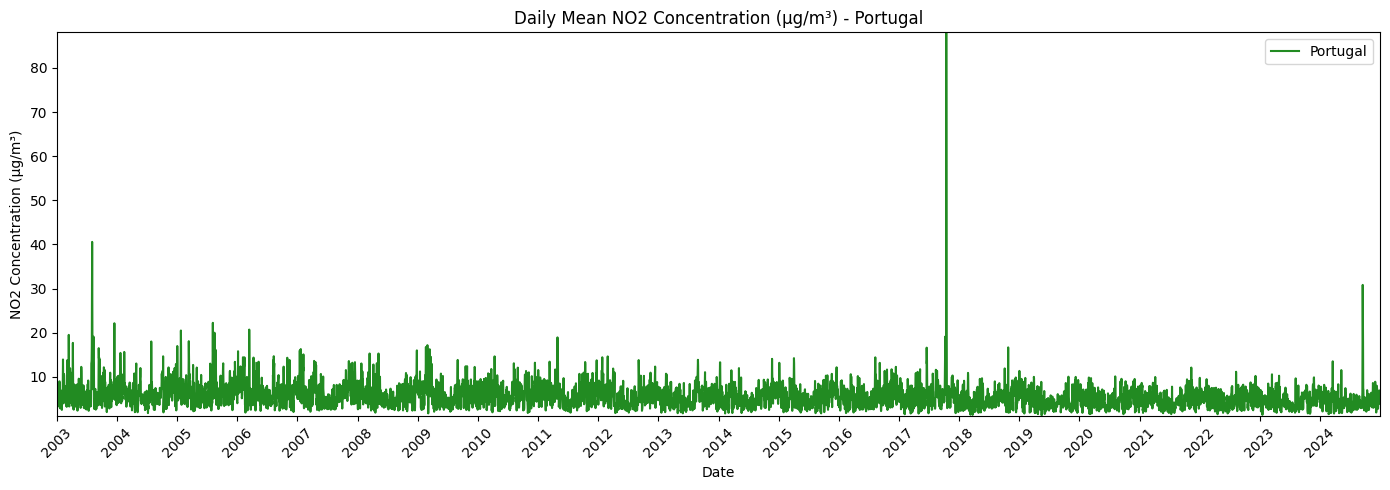

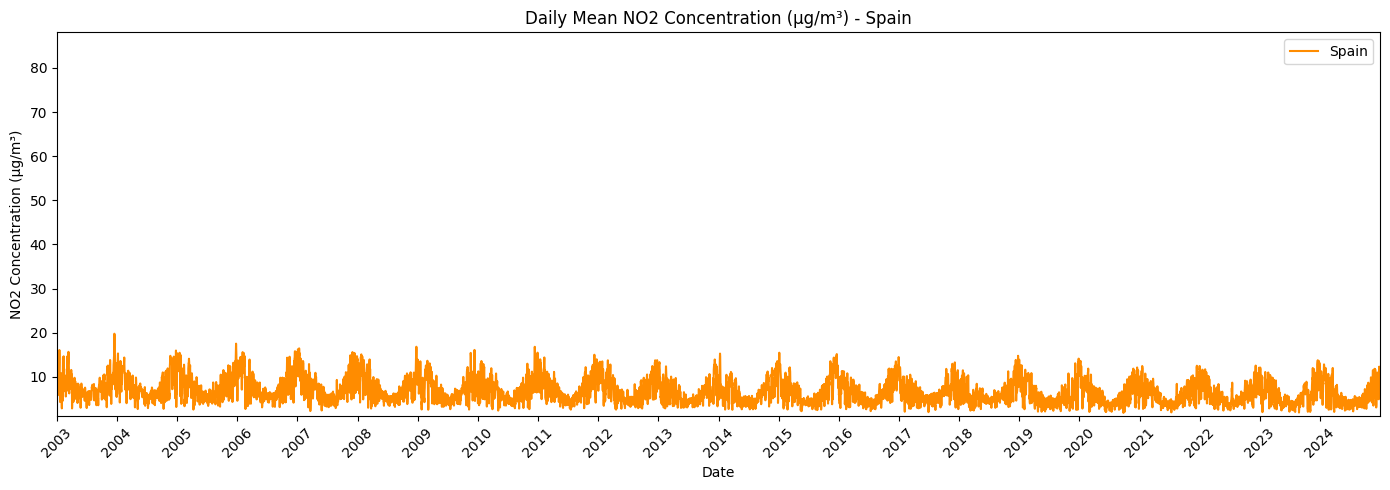

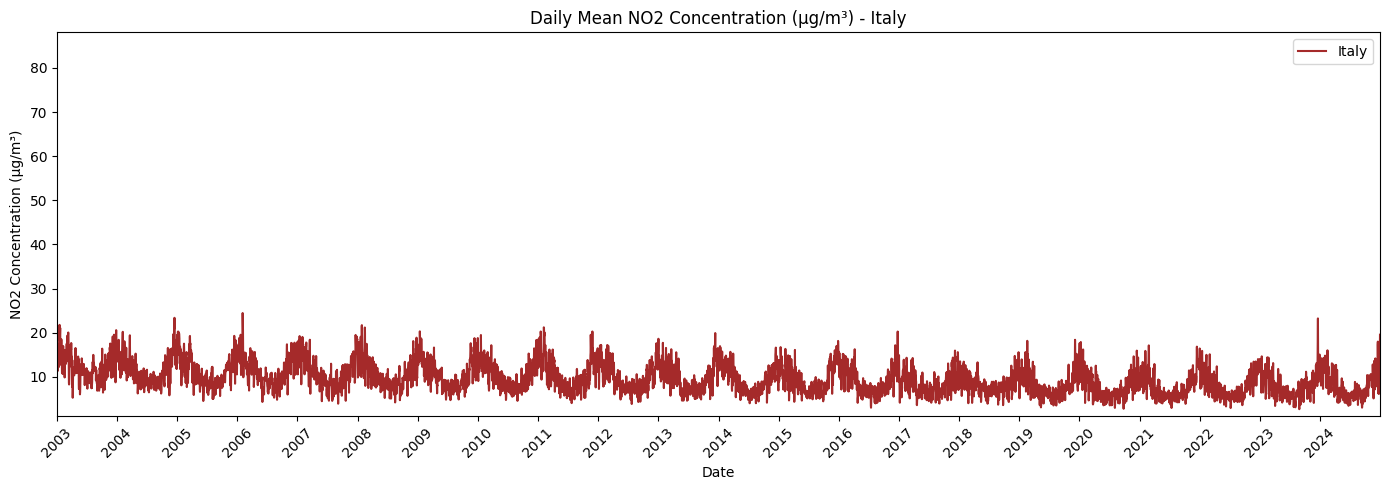

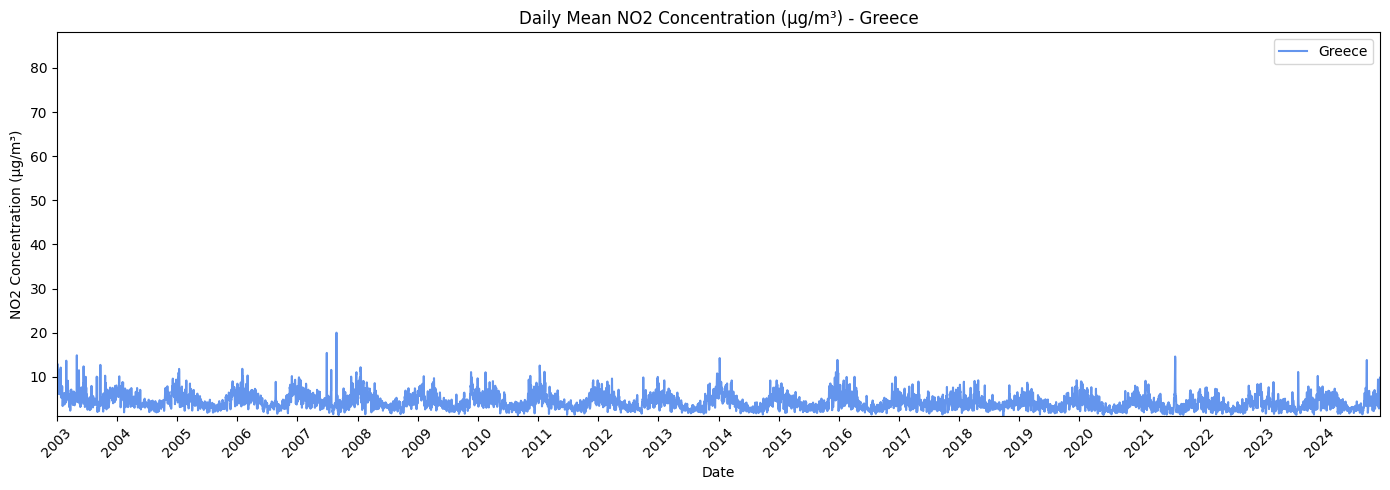

In [9]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no2_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO2 data and stack time ===
ds = xr.open_dataset(no2_file)
no2 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no2.sizes["time"]):
    y = int(no2["Year"].values[i])
    m = int(no2["Month"].values[i])
    d = int(no2["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no2 = no2.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no2.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean NO2 Concentration (µg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("NO2 Concentration (µg/m³)")
    plt.ylim(ymin, ymax)  # Keep the same y-axis across all figures
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


Global y_max set to: 47.28 µg/m³


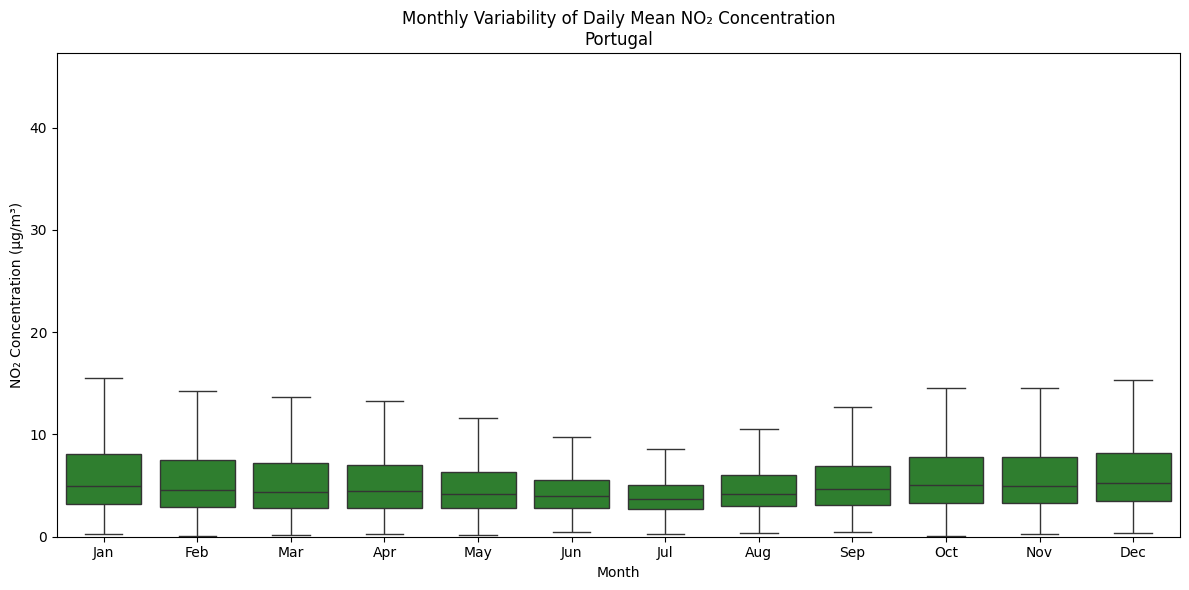

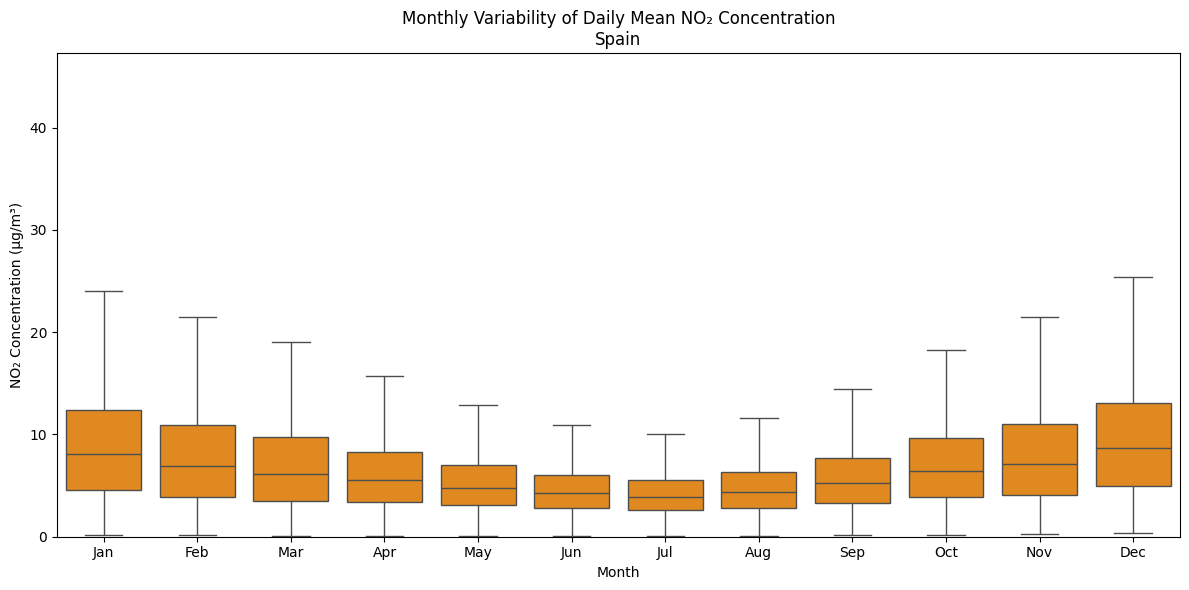

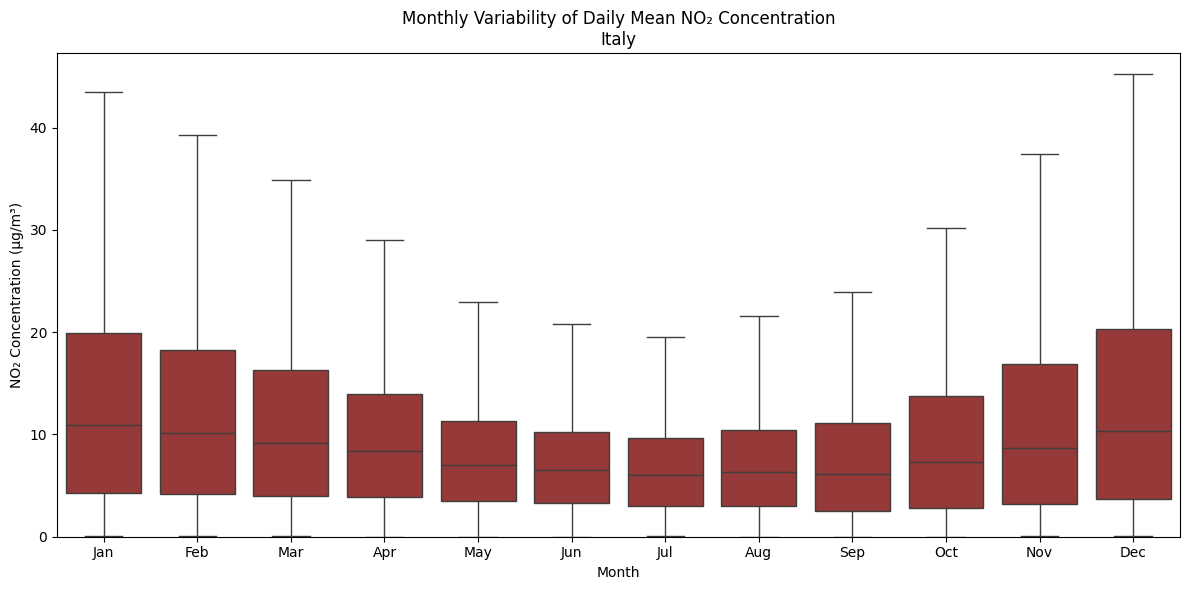

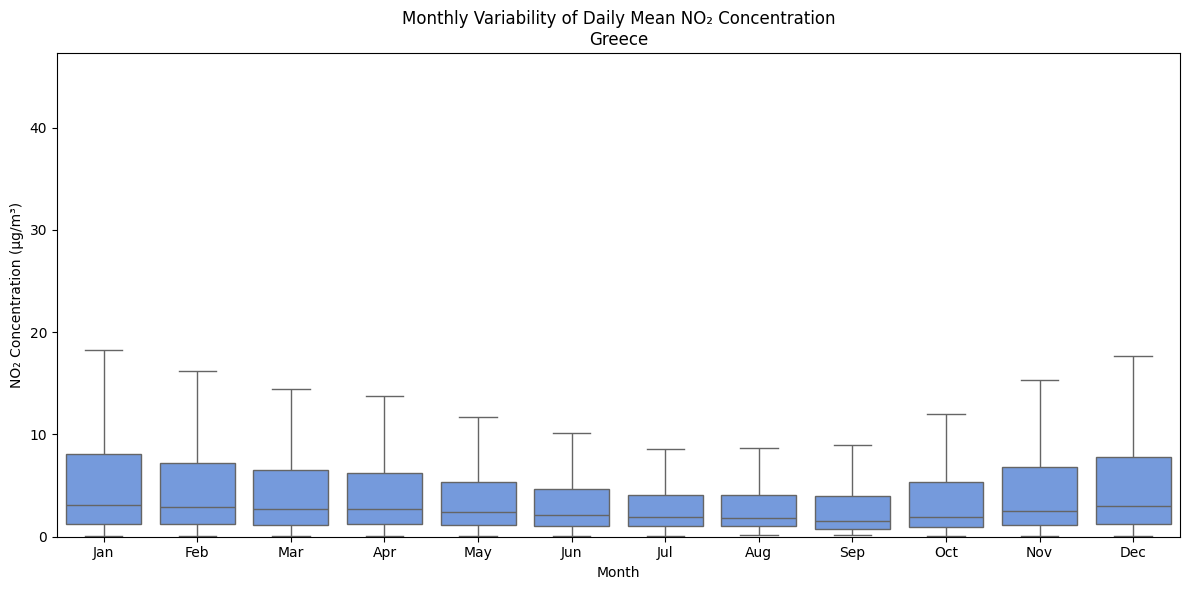

In [10]:
# Boxplot variability by month for every year with same y axis – NO₂ in µg/m³

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no2_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

ds = xr.open_dataset(no2_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: calculate global Y-axis limits ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no2 = ds["Mean"].where(mask)
    no2_stack = no2.stack(space=("latitude", "longitude"))

    values = no2_stack.values.reshape(-1)
    values = values[~np.isnan(values)]
    all_values.extend(values)

y_min = 0
y_max = np.percentile(all_values, 99.9) * 1.15  # robust max to avoid extreme outliers
print(f"Global y_max set to: {y_max:.2f} µg/m³")

# === Second pass: plot each region ===
for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no2 = ds["Mean"].where(mask)
    no2_stack = no2.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        values = no2_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5, color=colors[region])
    plt.ylim(y_min, y_max)
    plt.title(f"Monthly Variability of Daily Mean NO₂ Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("NO₂ Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()


Global y_max set to: 47.28 µg/m³


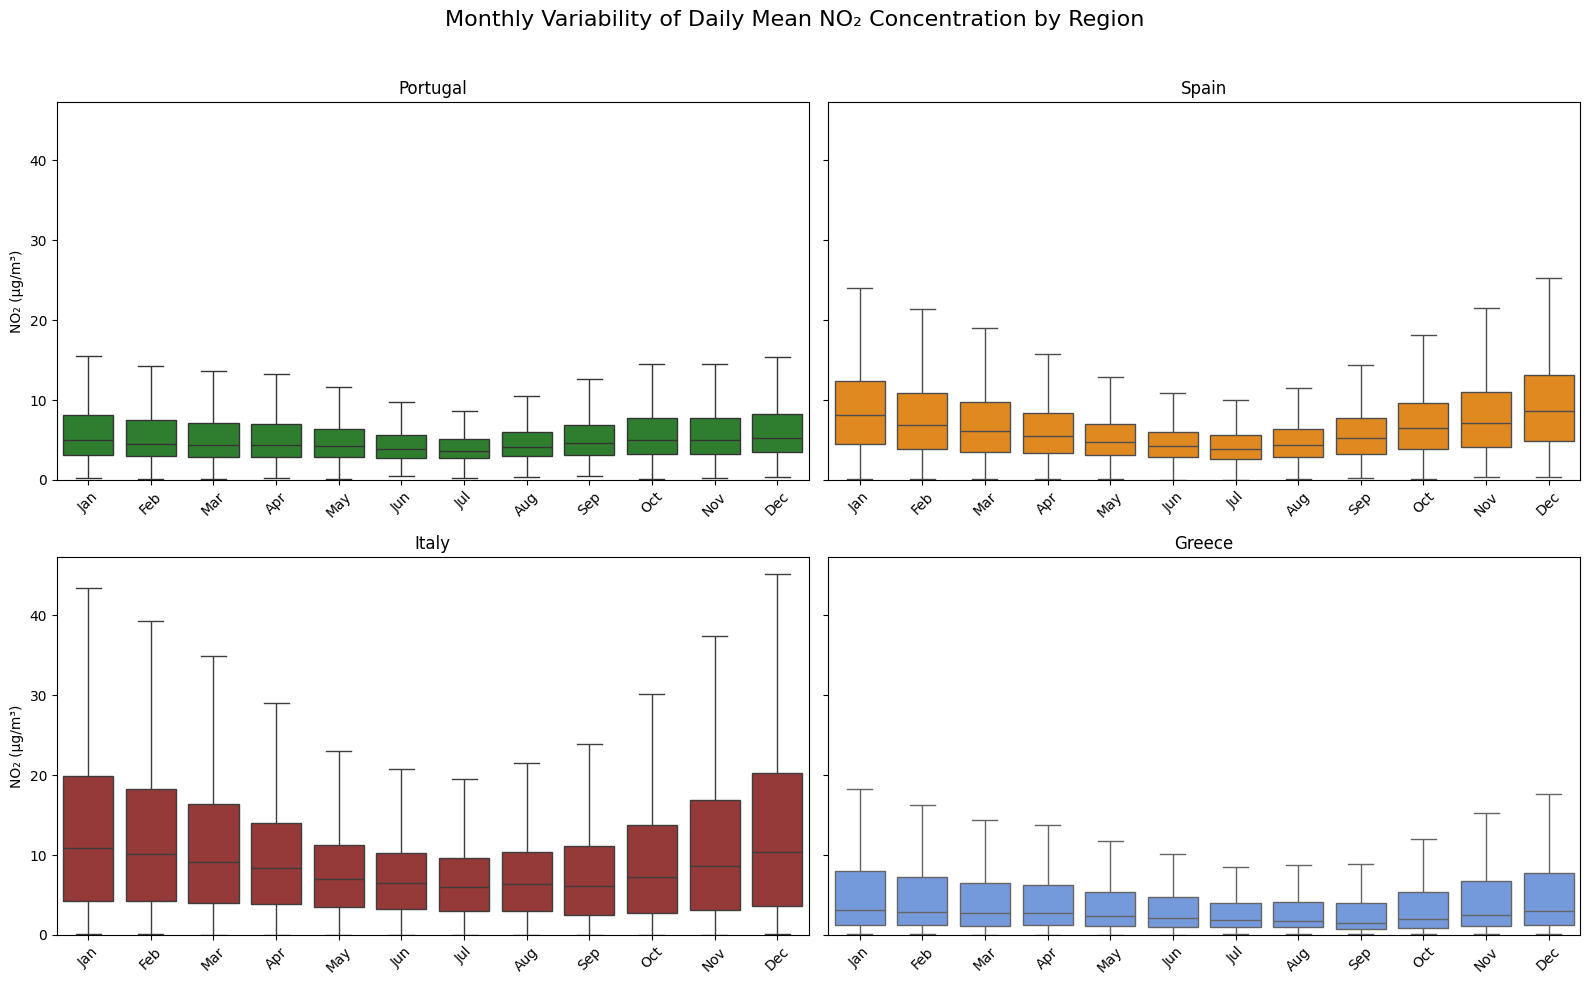

In [11]:
# Boxplot variability by month for every year with same y axis – NO₂ in µg/m³ (one figure)

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no2_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

ds = xr.open_dataset(no2_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: calculate global Y-axis limits ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no2 = ds["Mean"].where(mask)
    no2_stack = no2.stack(space=("latitude", "longitude"))

    values = no2_stack.values.reshape(-1)
    values = values[~np.isnan(values)]
    all_values.extend(values)

y_min = 0
y_max = np.percentile(all_values, 99.9) * 1.15  # add 15% headroom
print(f"Global y_max set to: {y_max:.2f} µg/m³")

# === Create subplots ===
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axs = axs.flatten()

for i, (region, mask_path) in enumerate(mask_files.items()):
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no2 = ds["Mean"].where(mask)
    no2_stack = no2.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        values = no2_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    sns.boxplot(ax=axs[i], x="Month", y="Value", data=df, showfliers=False, whis=1.5, color=colors[region])
    axs[i].set_title(region)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("NO₂ (µg/m³)")
    axs[i].set_ylim(y_min, y_max)
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle("Monthly Variability of Daily Mean NO₂ Concentration by Region", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


In [12]:
#Exceedances

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
no2_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(no2_file)

threshold = 25.0  # µg/m³

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    no2 = ds["Mean"].where(mask)

    # Calculate spatial average daily mean NO2
    regional_mean = no2.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="NO2_mean").reset_index()
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["NO2_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove4")
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove4").fillna(0).astype(int)
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean NO2 concentration exceeds 25 µg/m³:\n")
print(table)




Number of days per year where daily mean NO2 concentration exceeds 25 µg/m³:

Region  Portugal
Year            
2003           2
2017           2
2024           1
Total          5


### NO

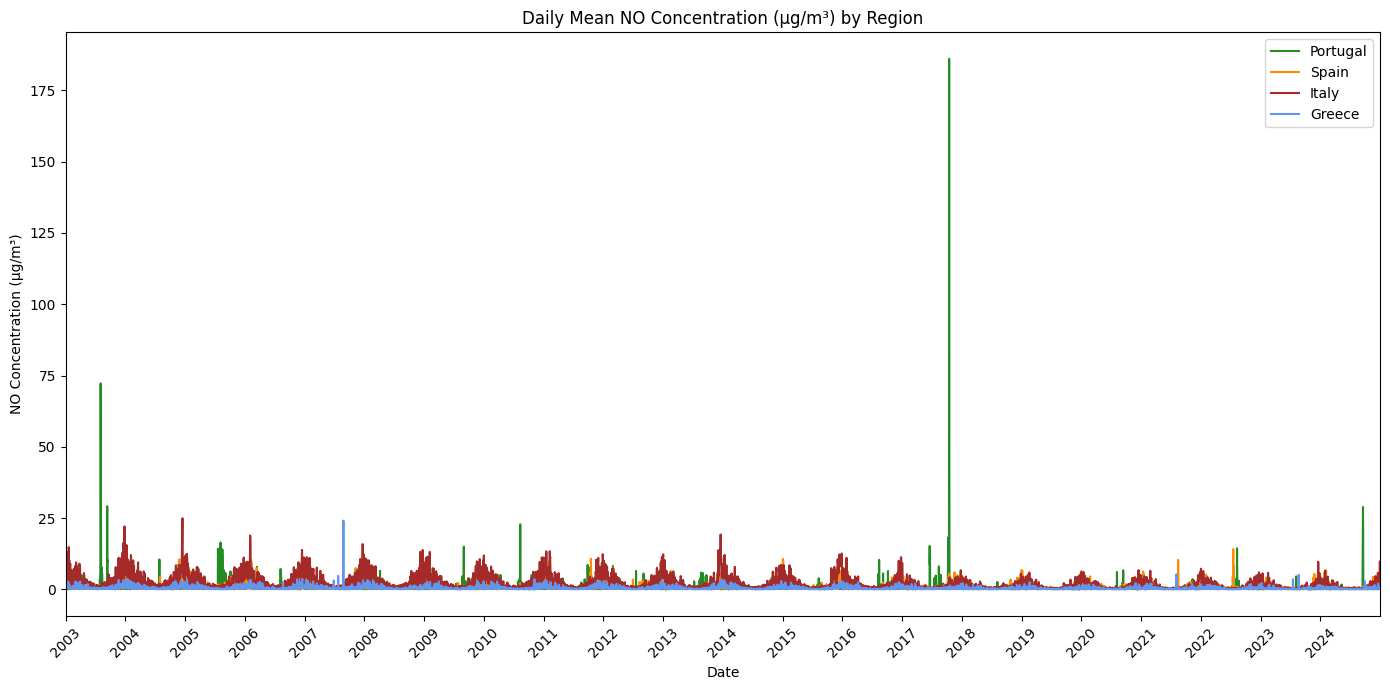

In [13]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO data and stack time ===
ds = xr.open_dataset(no_file)
no = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no.sizes["time"]):
    y = int(no["Year"].values[i])
    m = int(no["Month"].values[i])
    d = int(no["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no = no.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean NO Concentration (µg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("NO Concentration (µg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


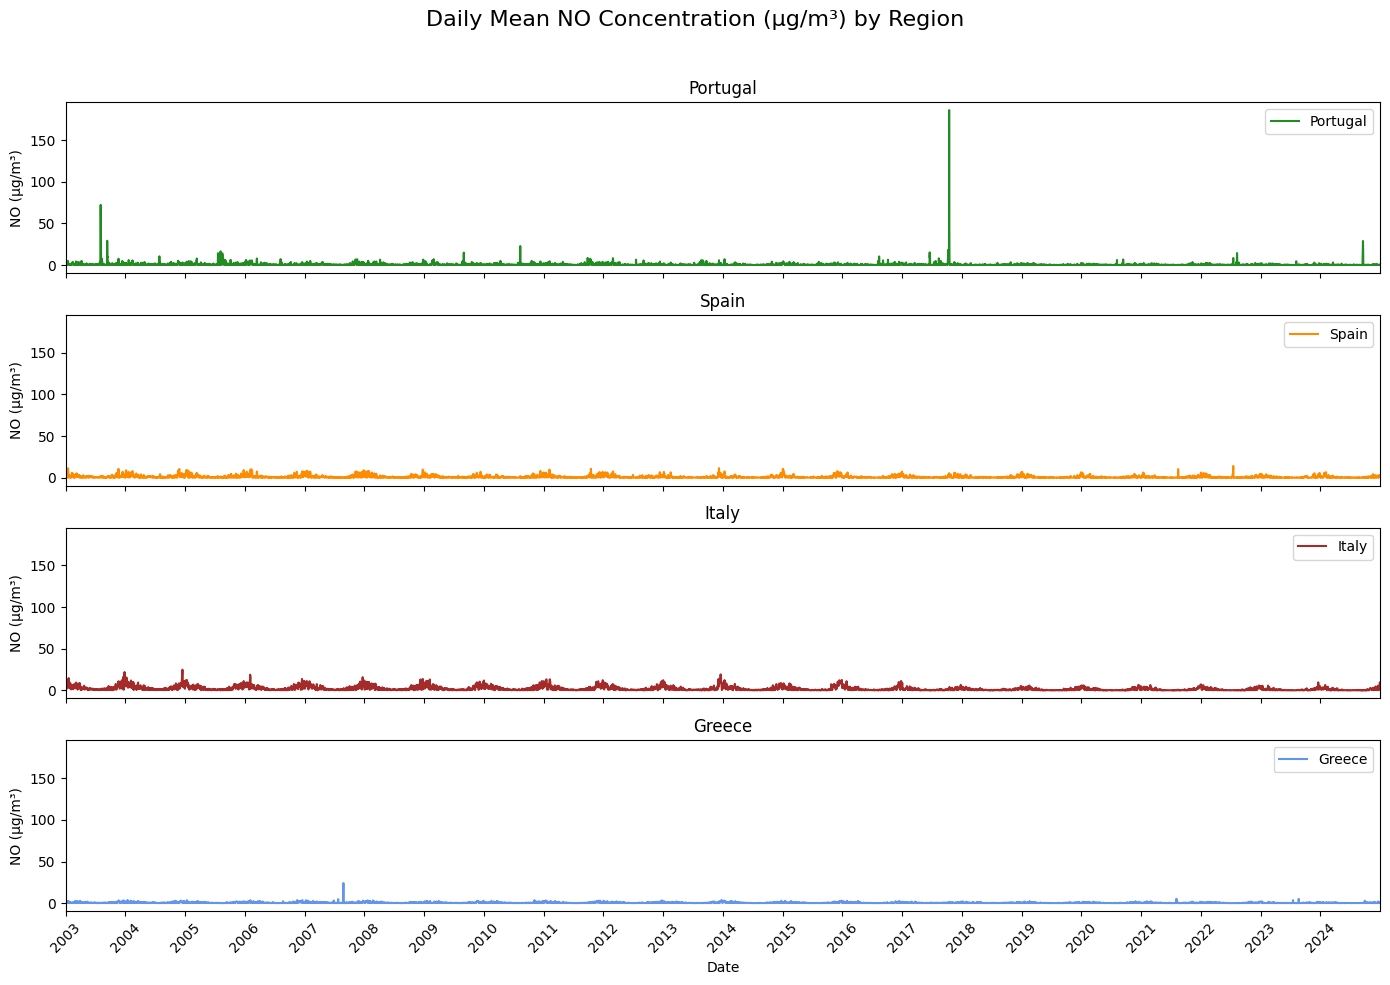

In [14]:
#Time series with daily averages by region separated

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO data and stack time ===
ds = xr.open_dataset(no_file)
no = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no.sizes["time"]):
    y = int(no["Year"].values[i])
    m = int(no["Month"].values[i])
    d = int(no["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no = no.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("NO (µg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean NO Concentration (µg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

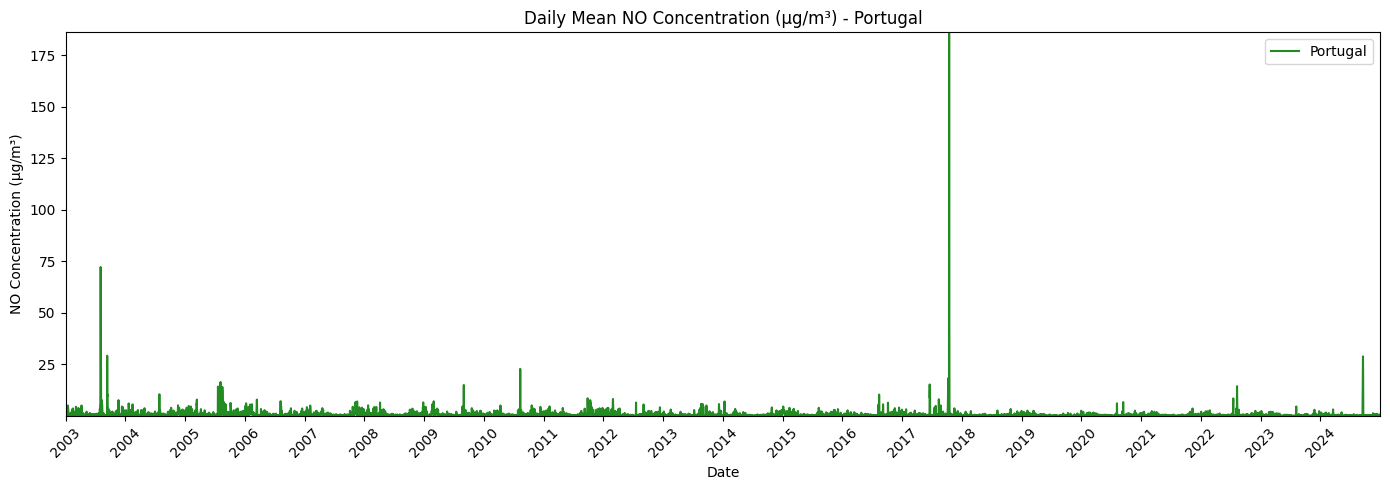

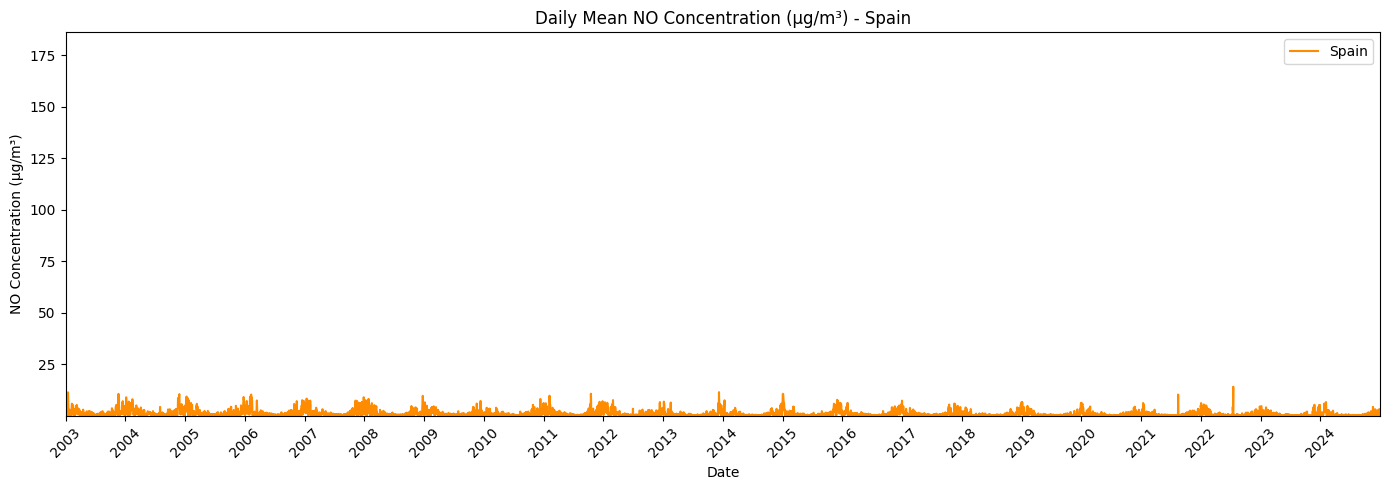

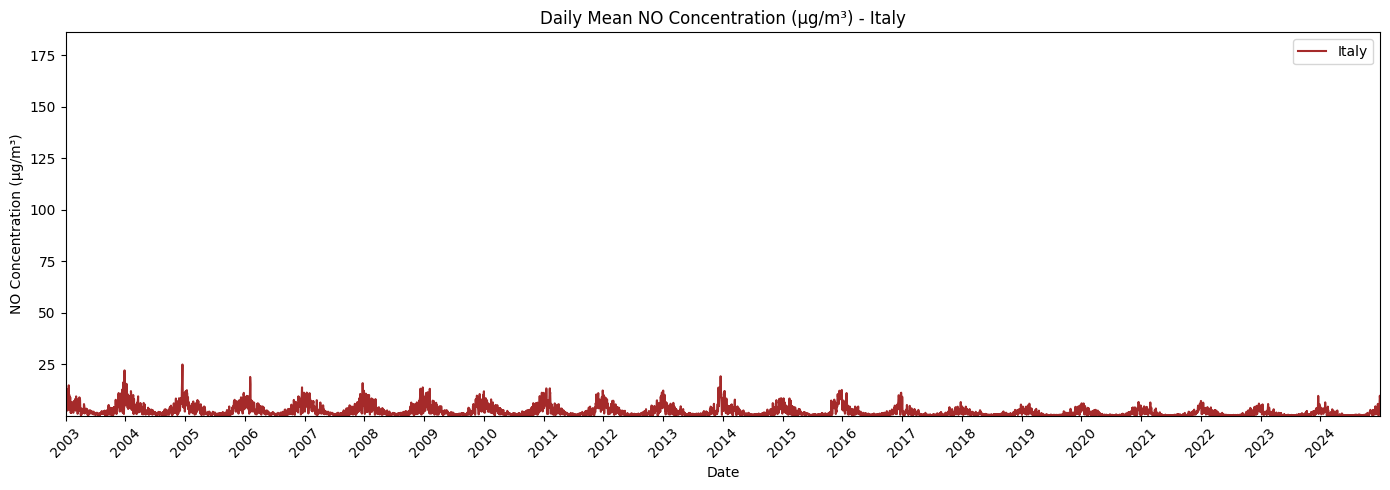

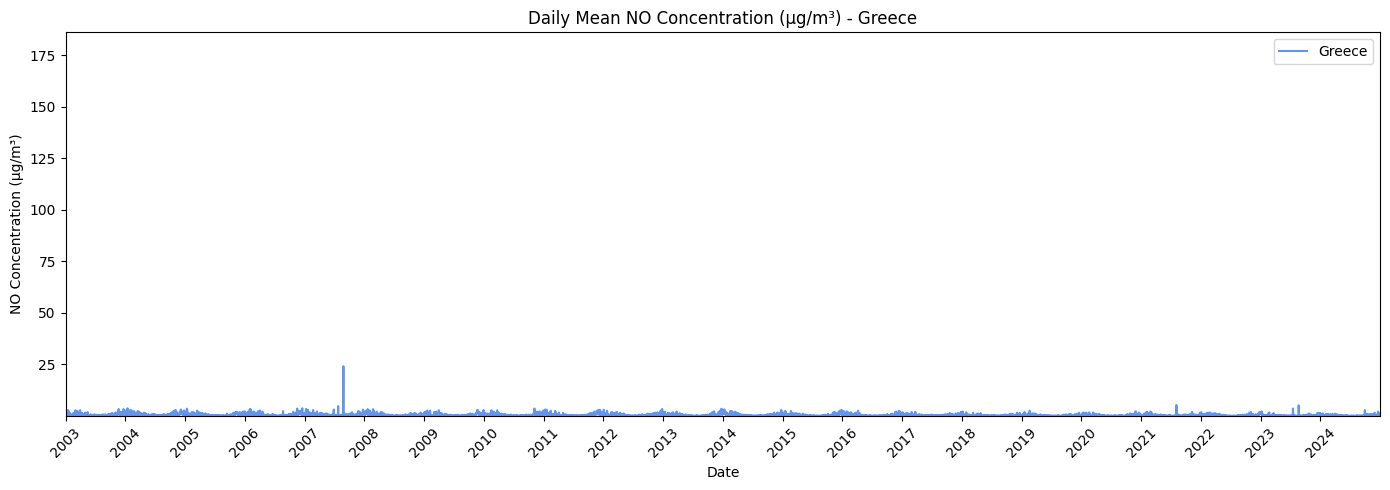

In [15]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
no_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load NO data and stack time ===
ds = xr.open_dataset(no_file)
no = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(no.sizes["time"]):
    y = int(no["Year"].values[i])
    m = int(no["Month"].values[i])
    d = int(no["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
no = no.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = no.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean NO Concentration (µg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("NO Concentration (µg/m³)")
    plt.ylim(ymin, ymax)  # Keep the same y-axis across all figures
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


Global y_max set to: 13.38 µg/m³ (excluding outliers)


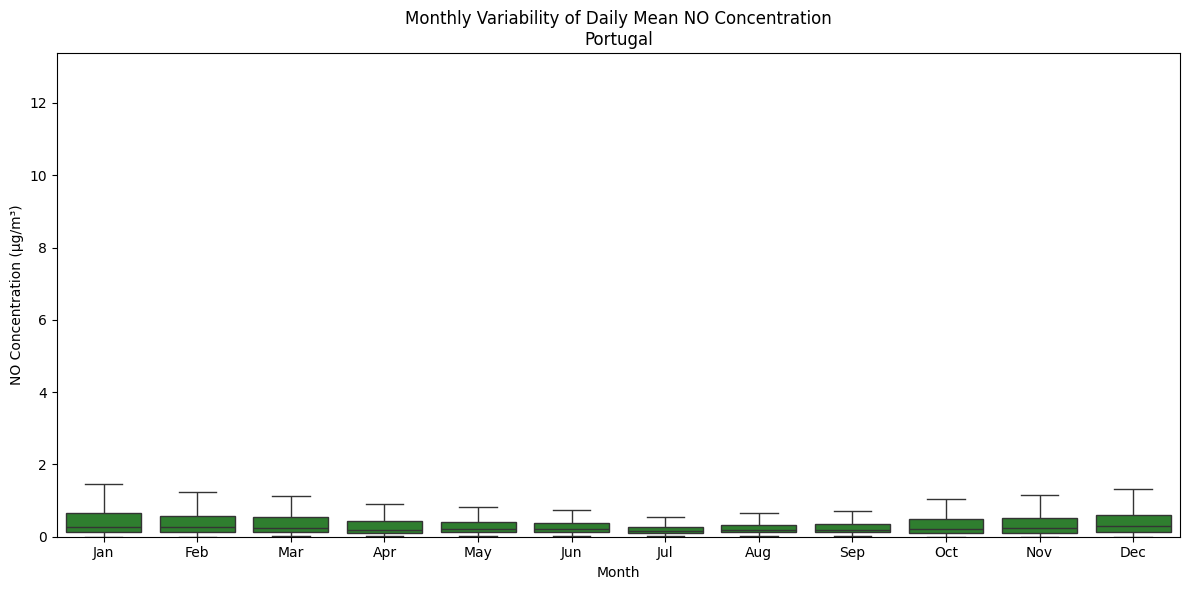

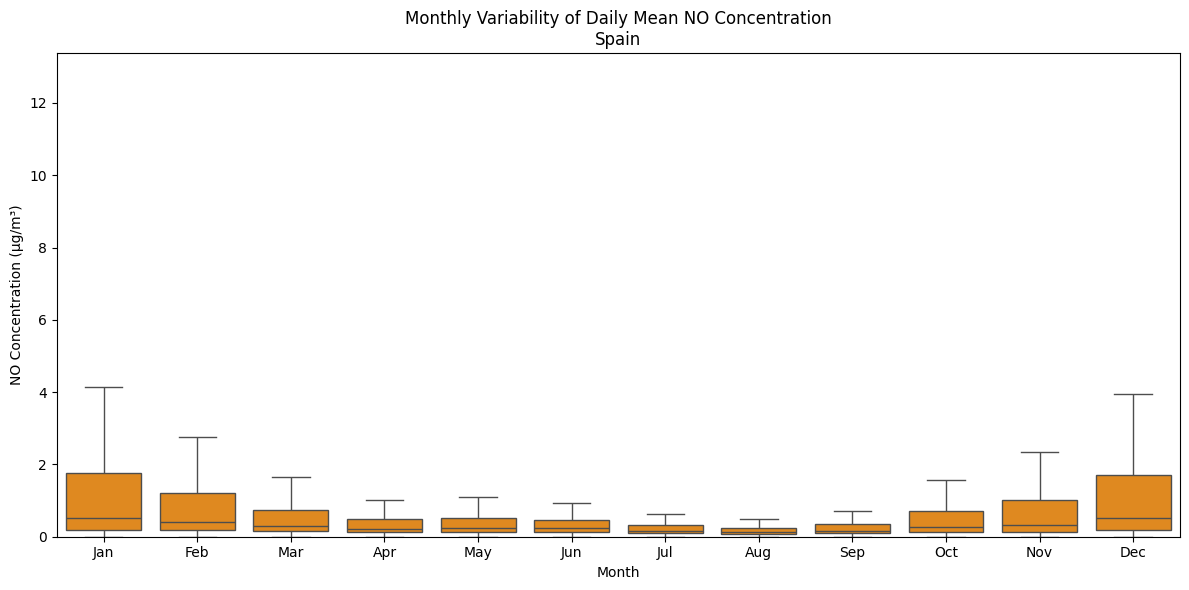

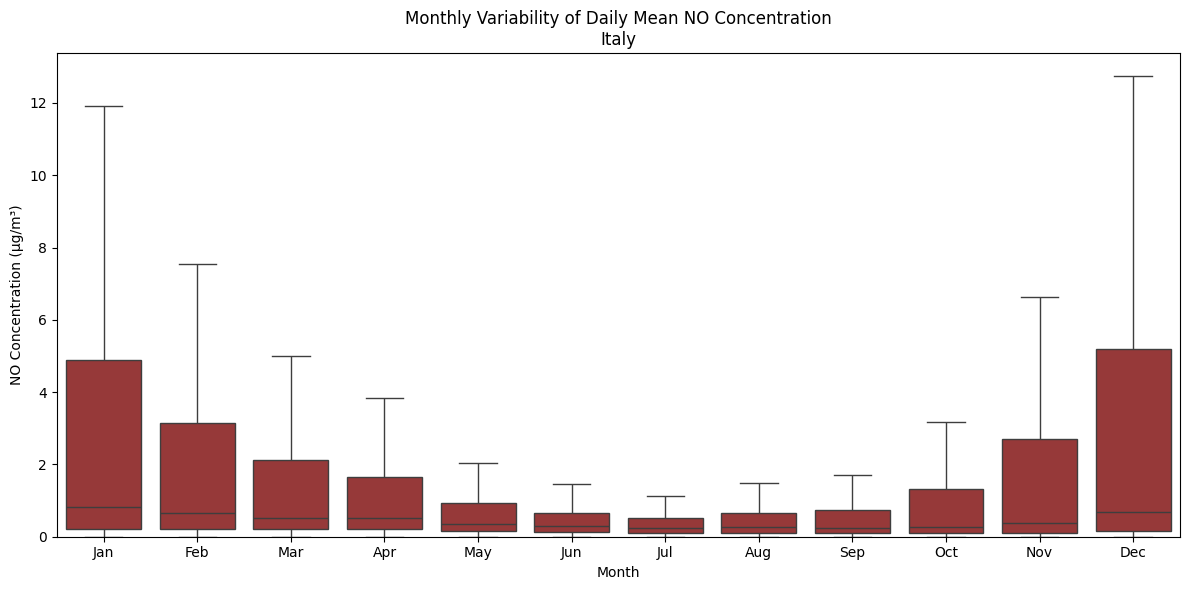

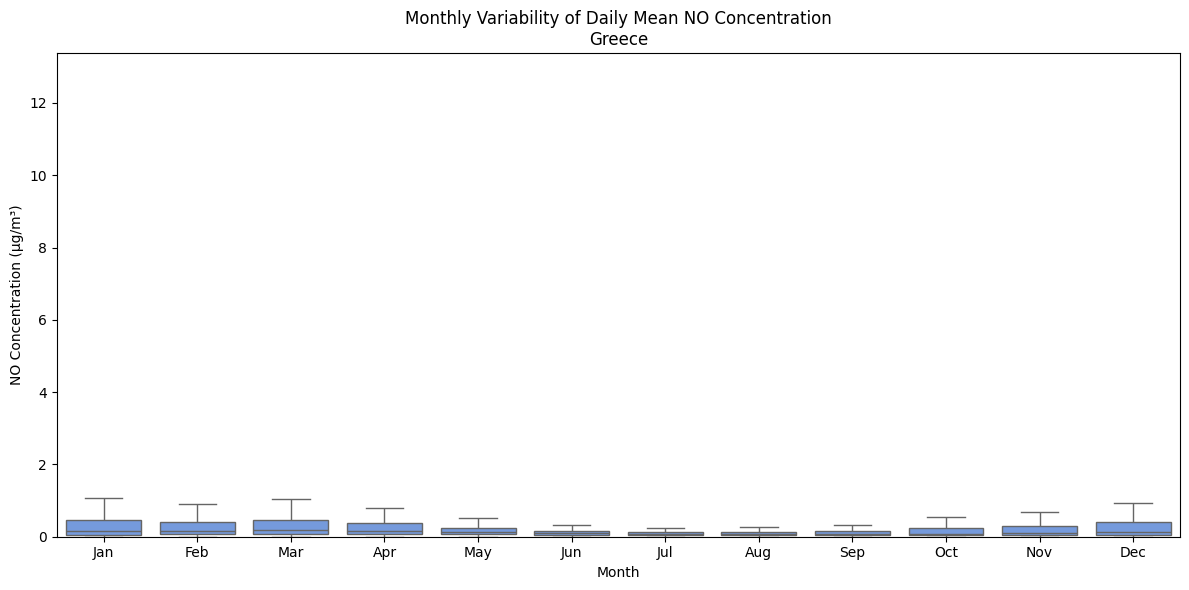

In [16]:
# Boxplot variability by month for every year with same y axis – NO in µg/m³, excluding outliers from y-limit

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

ds = xr.open_dataset(no_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: calculate robust global y-axis limit excluding outliers ===
non_outlier_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no = ds["Mean"].where(mask)
    no_stack = no.stack(space=("latitude", "longitude"))

    for month in range(1, 13):
        values = no_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        if len(values) < 10:
            continue  # skip sparse data

        q1 = np.percentile(values, 25)
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        non_outliers = values[(values >= lower) & (values <= upper)]
        non_outlier_values.extend(non_outliers)

y_min = 0
y_max = max(non_outlier_values) * 1.05  # small padding
print(f"Global y_max set to: {y_max:.2f} µg/m³ (excluding outliers)")

# === Second pass: generate individual region plots ===
for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no = ds["Mean"].where(mask)
    no_stack = no.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        values = no_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5, color=colors[region])
    plt.ylim(y_min, y_max)
    plt.title(f"Monthly Variability of Daily Mean NO Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("NO Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()


Global y_max set to: 13.38 µg/m³ (excluding outliers)


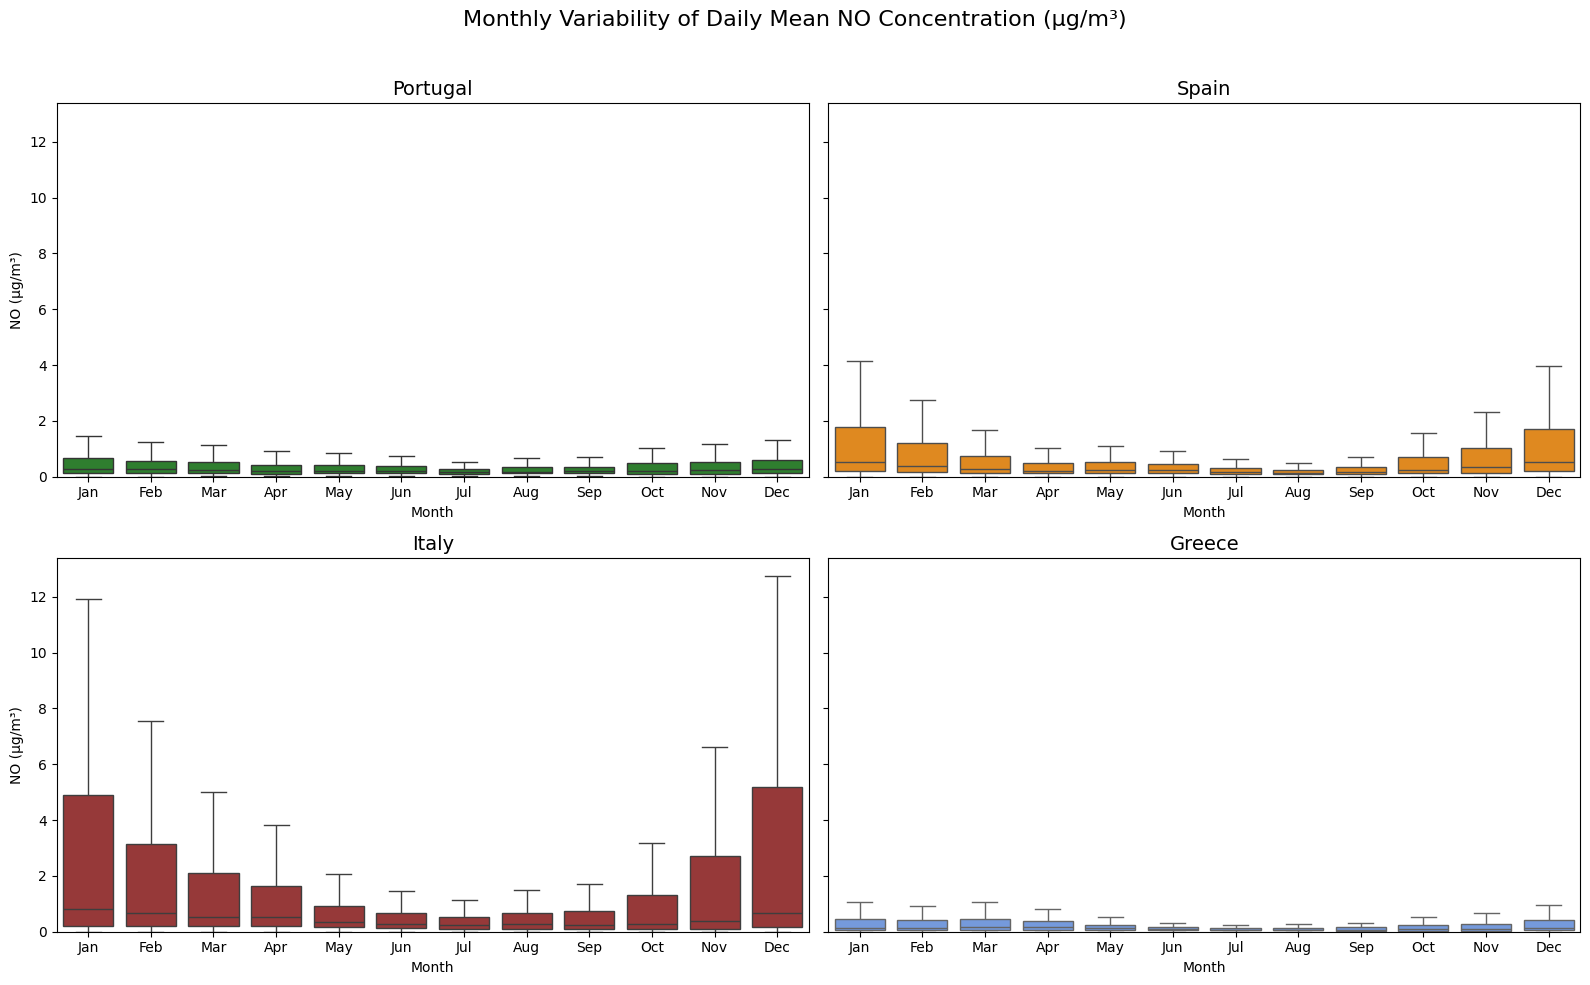

In [17]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
no_file = r"D:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Portugal": "forestgreen",
    "Spain": "darkorange",
    "Italy": "brown",
    "Greece": "cornflowerblue"
}

ds = xr.open_dataset(no_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === Step 1: Compute global y-axis limit excluding outliers ===
non_outlier_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no = ds["Mean"].where(mask)
    no_stack = no.stack(space=("latitude", "longitude"))

    for month in range(1, 13):
        values = no_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        if len(values) < 10:
            continue
        q1 = np.percentile(values, 25)
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        non_outliers = values[(values >= lower) & (values <= upper)]
        non_outlier_values.extend(non_outliers)

y_min = 0
y_max = max(non_outlier_values) * 1.05  # padding
print(f"Global y_max set to: {y_max:.2f} µg/m³ (excluding outliers)")

# === Step 2: Plot all in one image ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for idx, (region, mask_path) in enumerate(mask_files.items()):
    mask = xr.open_dataset(mask_path)["mask"] == 1
    no = ds["Mean"].where(mask)
    no_stack = no.stack(space=("latitude", "longitude"))

    all_data = []
    for month in range(1, 13):
        values = no_stack.sel(Month=month).values.reshape(-1)
        values = values[~np.isnan(values)]
        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(values),
            "Value": values
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    sns.boxplot(ax=axes[idx], x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region])
    axes[idx].set_ylim(y_min, y_max)
    axes[idx].set_title(f"{region}", fontsize=14)
    axes[idx].set_xlabel("Month")
    axes[idx].set_ylabel("NO (µg/m³)")

# === Final adjustments ===
fig.suptitle("Monthly Variability of Daily Mean NO Concentration (µg/m³)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### PM2.5

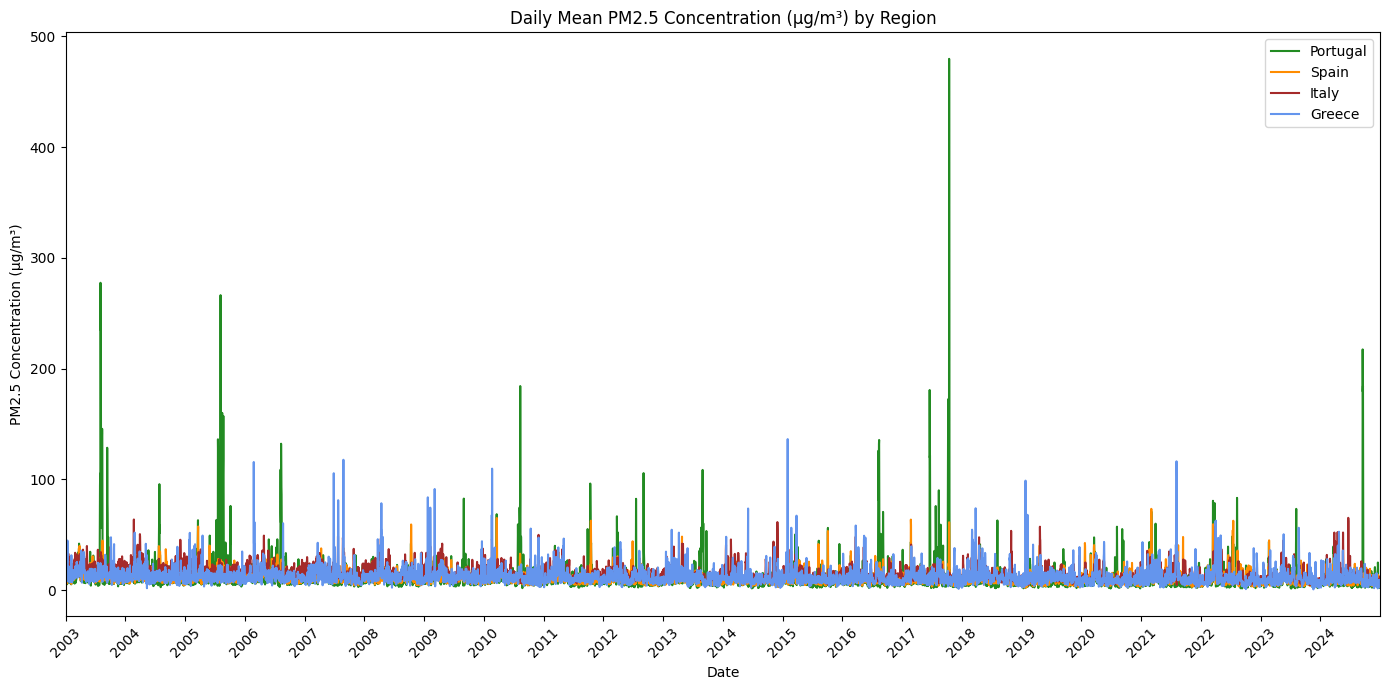

In [18]:
#Time series with daily averages by region

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm2p5_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM2.5 data and stack time ===
ds = xr.open_dataset(pm2p5_file)
pm2p5 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm2p5.sizes["time"]):
    y = int(pm2p5["Year"].values[i])
    m = int(pm2p5["Month"].values[i])
    d = int(pm2p5["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
pm2p5 = pm2p5.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = pm2p5.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean PM2.5 Concentration (µg/m³) by Region")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


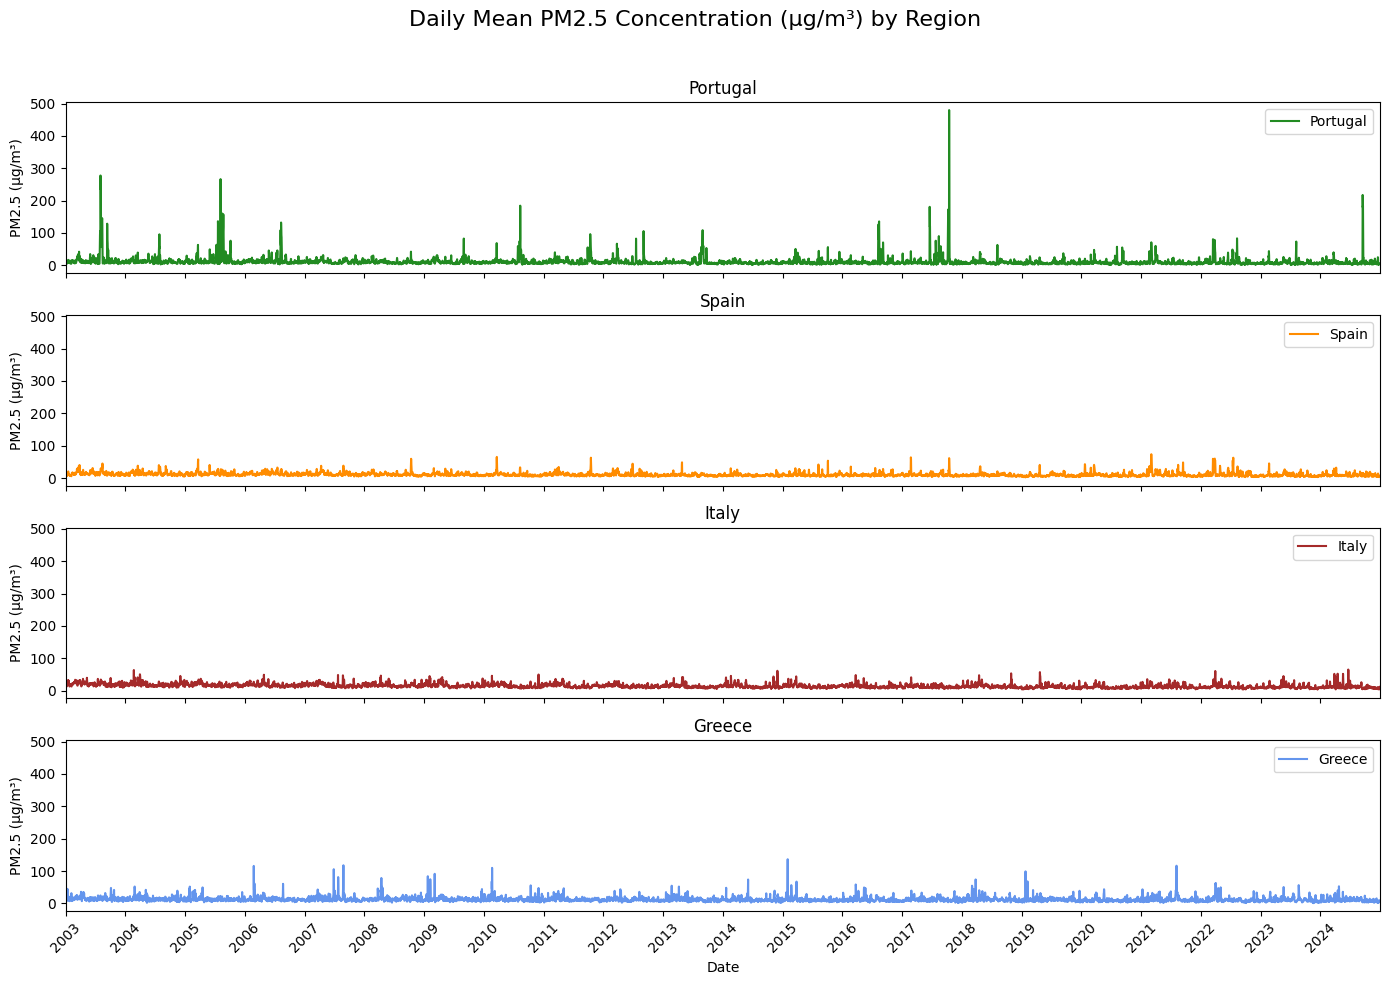

In [19]:
# Time series with daily averages by region (separated)

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm2p5_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM2.5 data and stack time ===
ds = xr.open_dataset(pm2p5_file)
pm2p5 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm2p5.sizes["time"]):
    y = int(pm2p5["Year"].values[i])
    m = int(pm2p5["Month"].values[i])
    d = int(pm2p5["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
pm2p5 = pm2p5.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = pm2p5.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean PM2.5 Concentration (µg/m³) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()


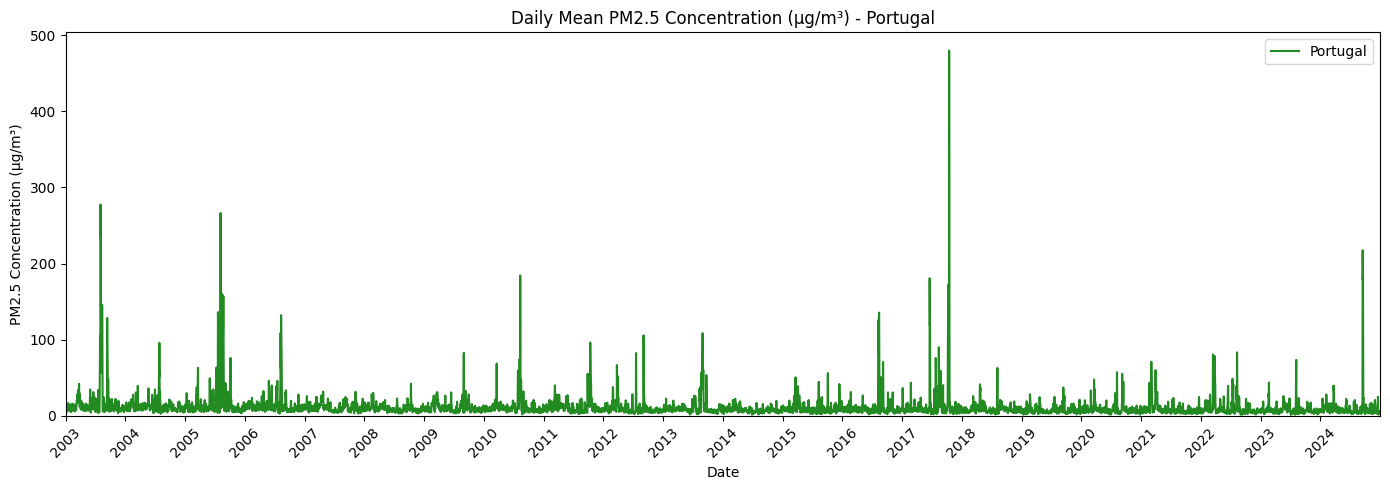

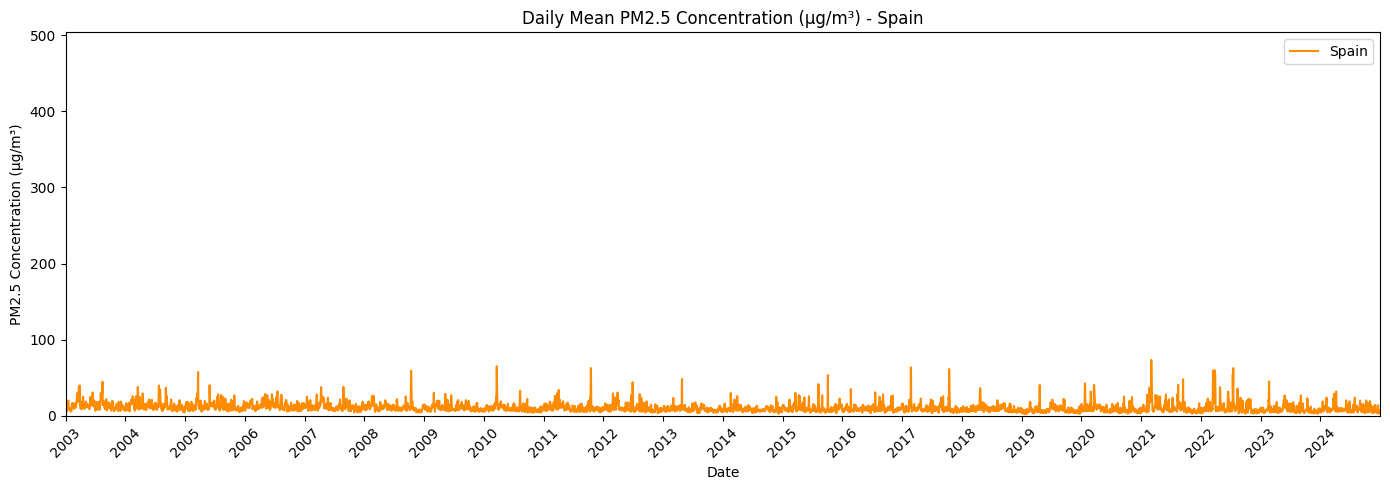

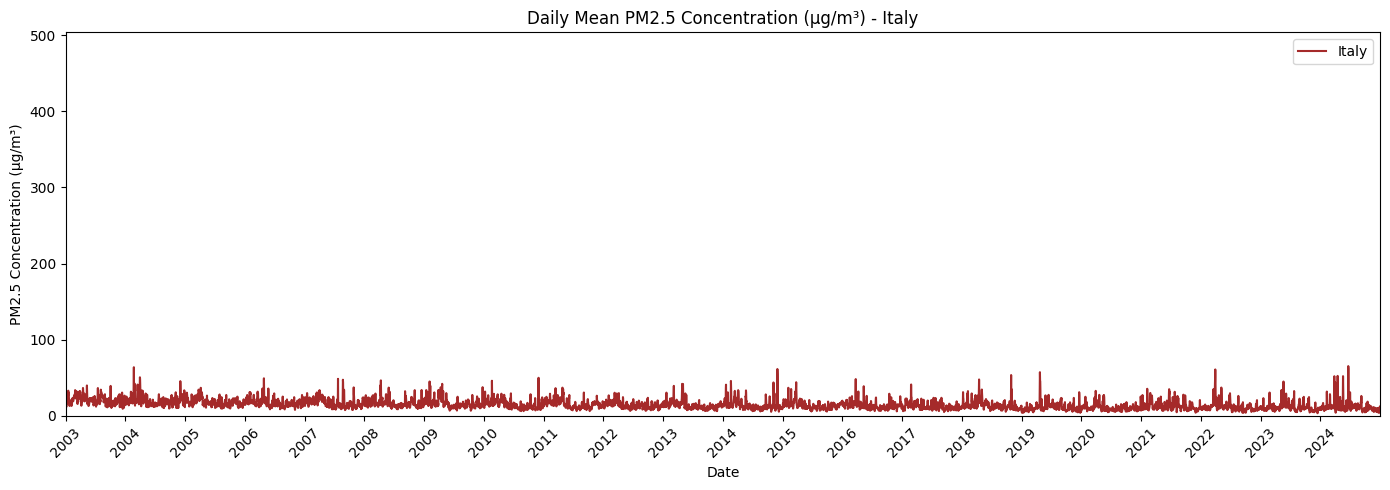

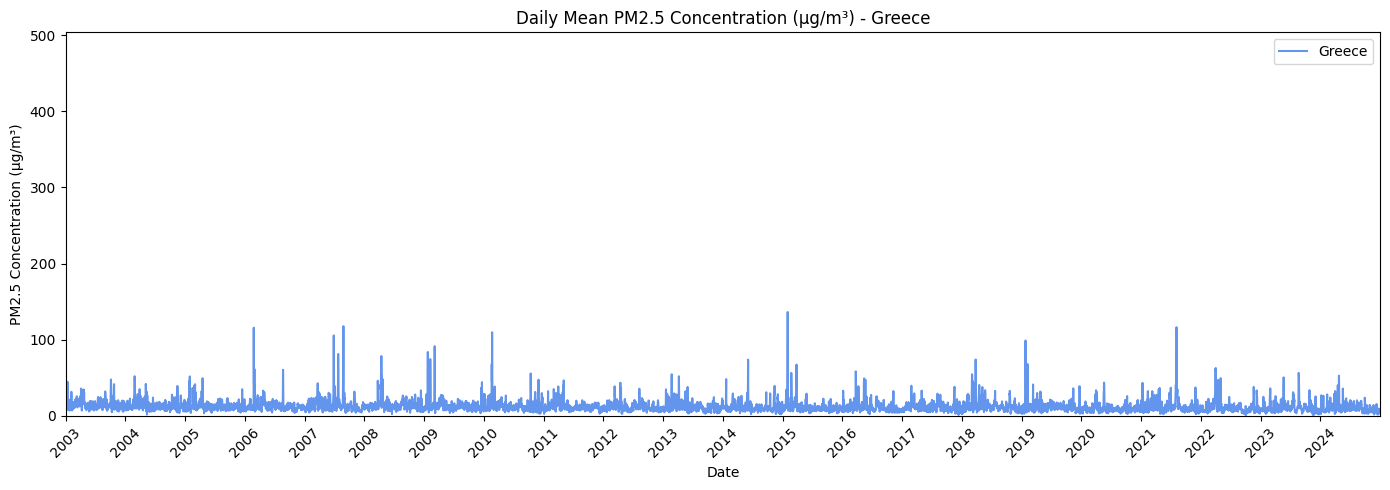

In [20]:
# Time series with daily averages by region (one plot per region)

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm2p5_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM2.5 data and stack time ===
ds = xr.open_dataset(pm2p5_file)
pm2p5 = ds["Mean"].stack(time=("Year", "Month", "Day"))

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm2p5.sizes["time"]):
    y = int(pm2p5["Year"].values[i])
    m = int(pm2p5["Month"].values[i])
    d = int(pm2p5["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates like Feb 30

# Filter to valid dates
pm2p5 = pm2p5.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    # Apply mask and compute spatial average per time step
    masked = pm2p5.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One figure per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits across all regions
all_values = pd.concat(region_series.values())
ymin = 0  # keep the bottom clean
ymax = all_values.max() * 1.05  # add 5% headroom


for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean PM2.5 Concentration (µg/m³) - {region}")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Concentration (µg/m³)")
    plt.ylim(ymin, ymax)
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


Common y-axis range: 0 to 46.93 µg/m³


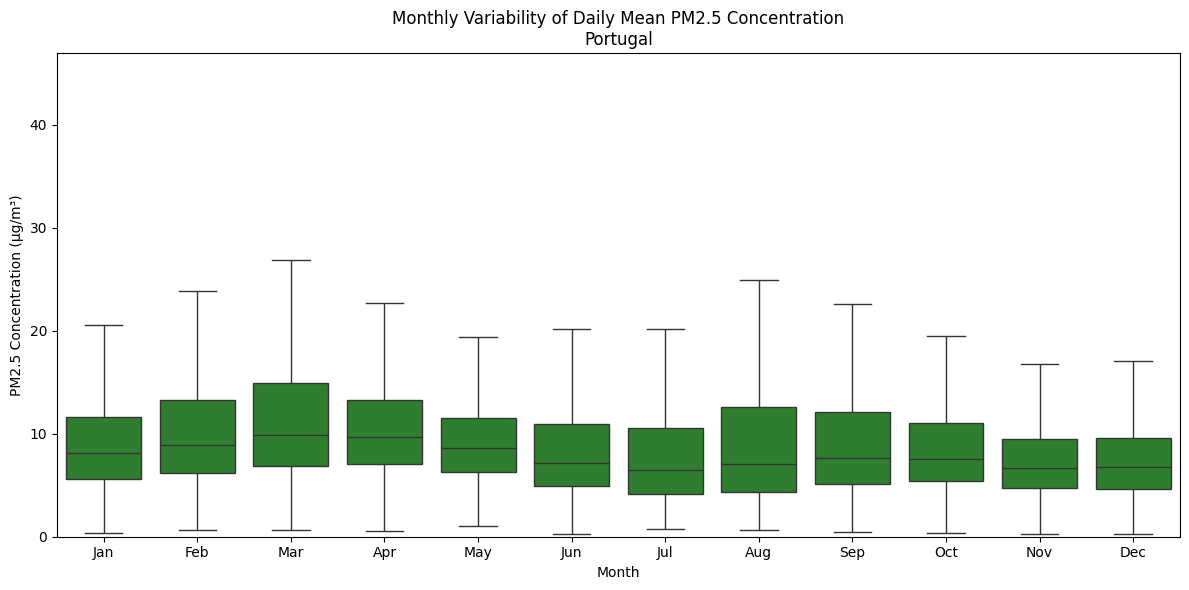

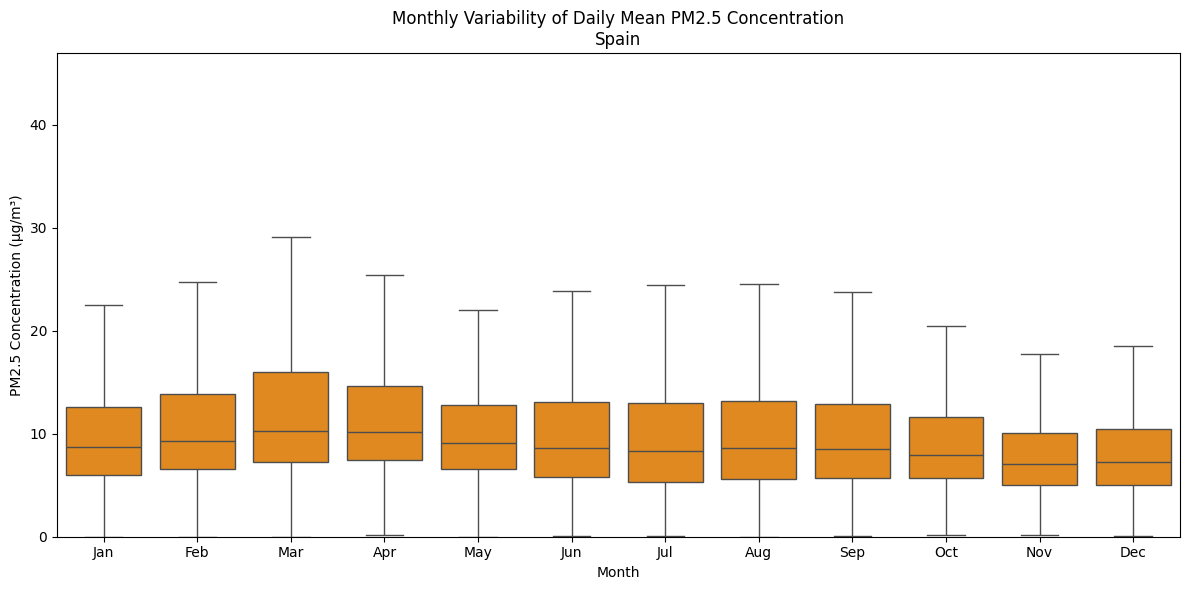

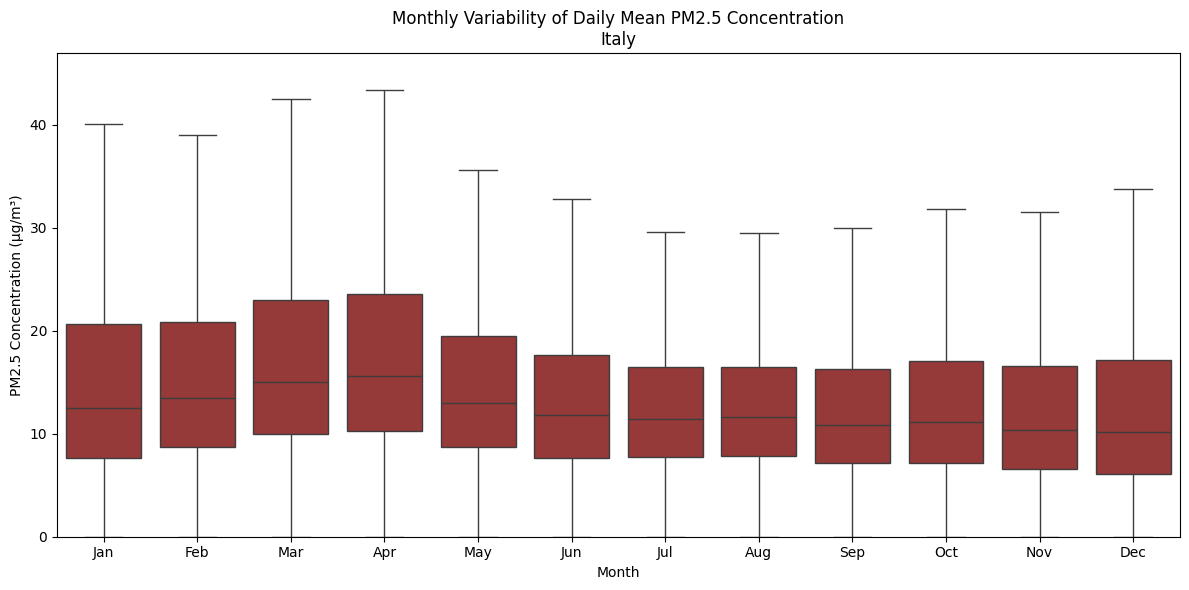

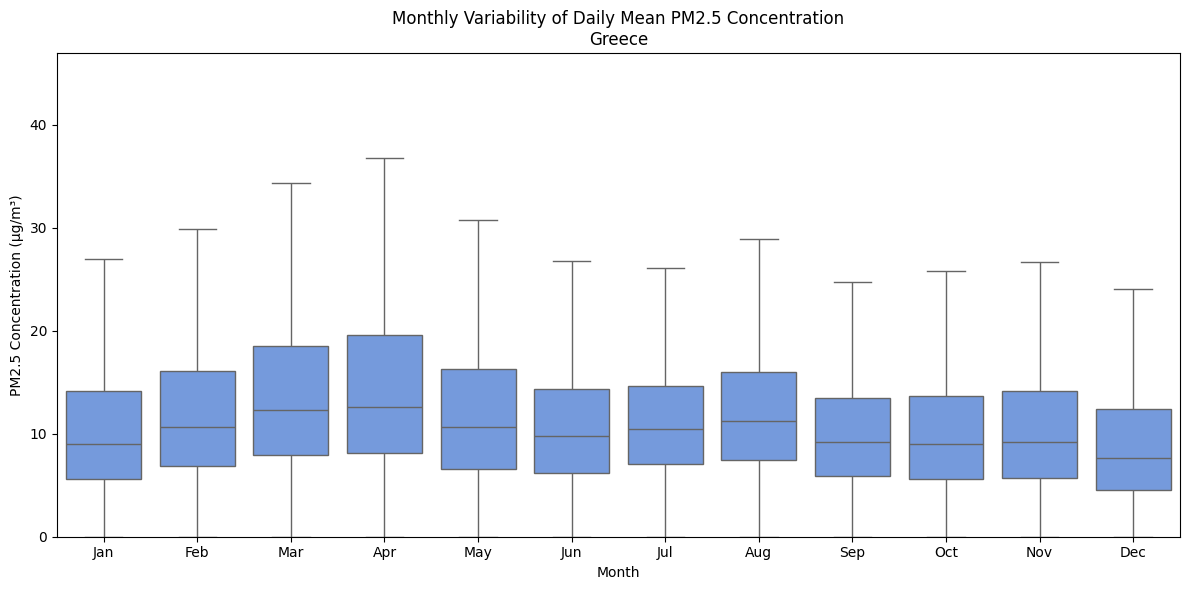

In [21]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
pm2p5_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Load PM2.5 dataset and month names
ds = xr.open_dataset(pm2p5_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: collect all non-outlier values across all regions ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm2p5 = ds["Mean"].where(mask)
    pm2p5_stack = pm2p5.stack(space=("latitude", "longitude"))

    # Gather all values, exclude NaNs
    vals = pm2p5_stack.values.reshape(-1)
    vals = vals[~np.isnan(vals)]

    # Calculate 1st and 99th percentile to exclude extreme outliers
    p1, p99 = np.percentile(vals, [1, 99])
    vals = vals[(vals >= p1) & (vals <= p99)]

    all_values.extend(vals)

# Determine global y-axis limits with padding
y_min = 0
y_max = np.percentile(all_values, 99) * 1.15  # 5% padding on top

print(f"Common y-axis range: 0 to {y_max:.2f} µg/m³")

# === Second pass: plot each region with common y-axis ===
for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm2p5 = ds["Mean"].where(mask)
    pm2p5_stack = pm2p5.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        month_data = pm2p5_stack.sel(Month=month).values.reshape(-1)
        month_data = month_data[~np.isnan(month_data)]

        # Optional: exclude outliers per month if desired
        # Commented out to keep consistent with global filtering
        # p1, p99 = np.percentile(month_data, [1, 99])
        # month_data = month_data[(month_data >= p1) & (month_data <= p99)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(month_data),
            "Value": month_data
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region])
    plt.ylim(y_min, y_max)
    plt.title(f"Monthly Variability of Daily Mean PM2.5 Concentration\n{region}")
    plt.xlabel("Month")
    plt.ylabel("PM2.5 Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()


Common y-axis range: 0 to 46.93 µg/m³


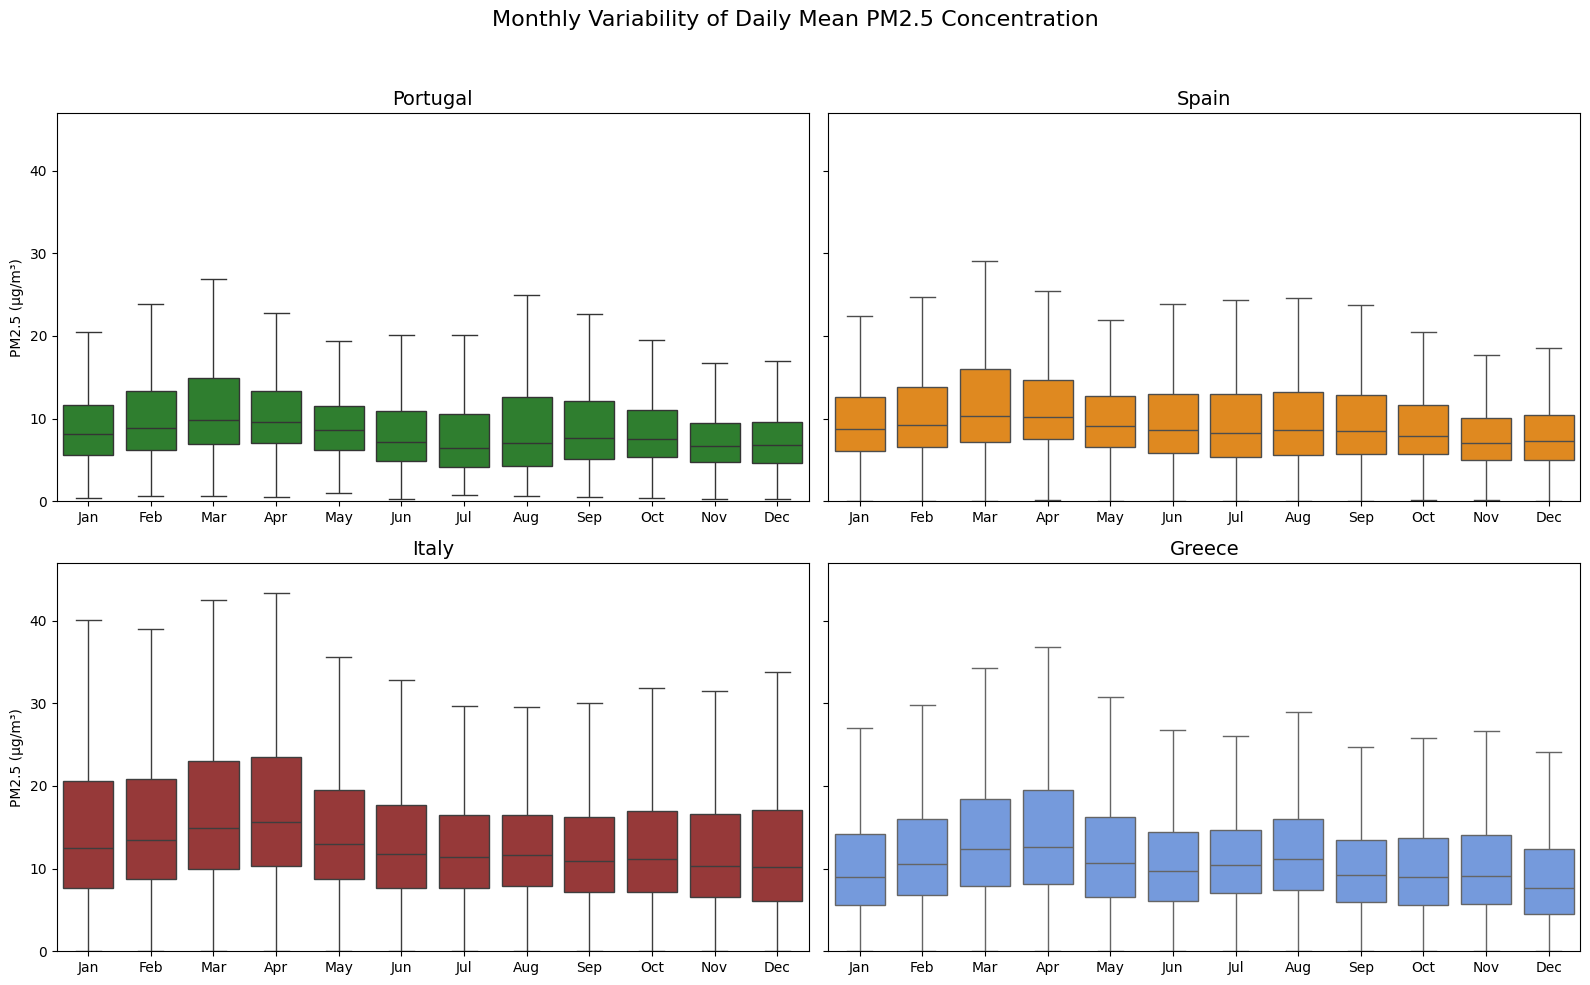

In [22]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
pm2p5_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Load PM2.5 dataset and month names
ds = xr.open_dataset(pm2p5_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: collect all non-outlier values across all regions ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm2p5 = ds["Mean"].where(mask)
    pm2p5_stack = pm2p5.stack(space=("latitude", "longitude"))

    vals = pm2p5_stack.values.reshape(-1)
    vals = vals[~np.isnan(vals)]

    # Exclude extreme outliers
    p1, p99 = np.percentile(vals, [1, 99])
    vals = vals[(vals >= p1) & (vals <= p99)]

    all_values.extend(vals)

# Shared y-axis limits with padding
y_min = 0
y_max = np.percentile(all_values, 99) * 1.15

print(f"Common y-axis range: 0 to {y_max:.2f} µg/m³")

# === Create single figure with subplots ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, (region, mask_path) in enumerate(mask_files.items()):
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm2p5 = ds["Mean"].where(mask)
    pm2p5_stack = pm2p5.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        month_data = pm2p5_stack.sel(Month=month).values.reshape(-1)
        month_data = month_data[~np.isnan(month_data)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(month_data),
            "Value": month_data
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region], ax=axes[i])
    axes[i].set_title(f"{region}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("PM2.5 (µg/m³)" if i % 2 == 0 else "")
    axes[i].set_ylim(y_min, y_max)

# Add global figure title and layout tweaks
fig.suptitle("Monthly Variability of Daily Mean PM2.5 Concentration", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


In [23]:
# Exceedances of PM2.5 daily mean > 25 µg/m³

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
pm2p5_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(pm2p5_file)

threshold = 15.0  # µg/m³

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    pm2p5 = ds["Mean"].where(mask)

    # Calculate spatial average daily mean PM2.5
    regional_mean = pm2p5.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="PM2p5_mean").reset_index()
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["PM2p5_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove15")
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove15").fillna(0).astype(int)
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean PM2.5 concentration exceeds 15 µg/m³:\n")
print(table)



Number of days per year where daily mean PM2.5 concentration exceeds 15 µg/m³:

Region  Greece  Italy  Portugal  Spain
Year                                  
2003       130    315       100    121
2004       112    276        88    112
2005       101    255       100    103
2006        93    251        90    117
2007       120    217        87     86
2008       109    200        42     56
2009        88    182        66     53
2010       104    147        49     34
2011        65    177        68     59
2012        74    146        54     51
2013        91    108        50     18
2014        54    106        20     22
2015        51    113        49     48
2016        61    107        36     21
2017        69     81        76     40
2018        84    116        25     20
2019        76     58        28     24
2020        42     49        27     30
2021        87    100        39     65
2022        49     58        60     76
2023        66     65        36     34
2024        47     54 

### PM10

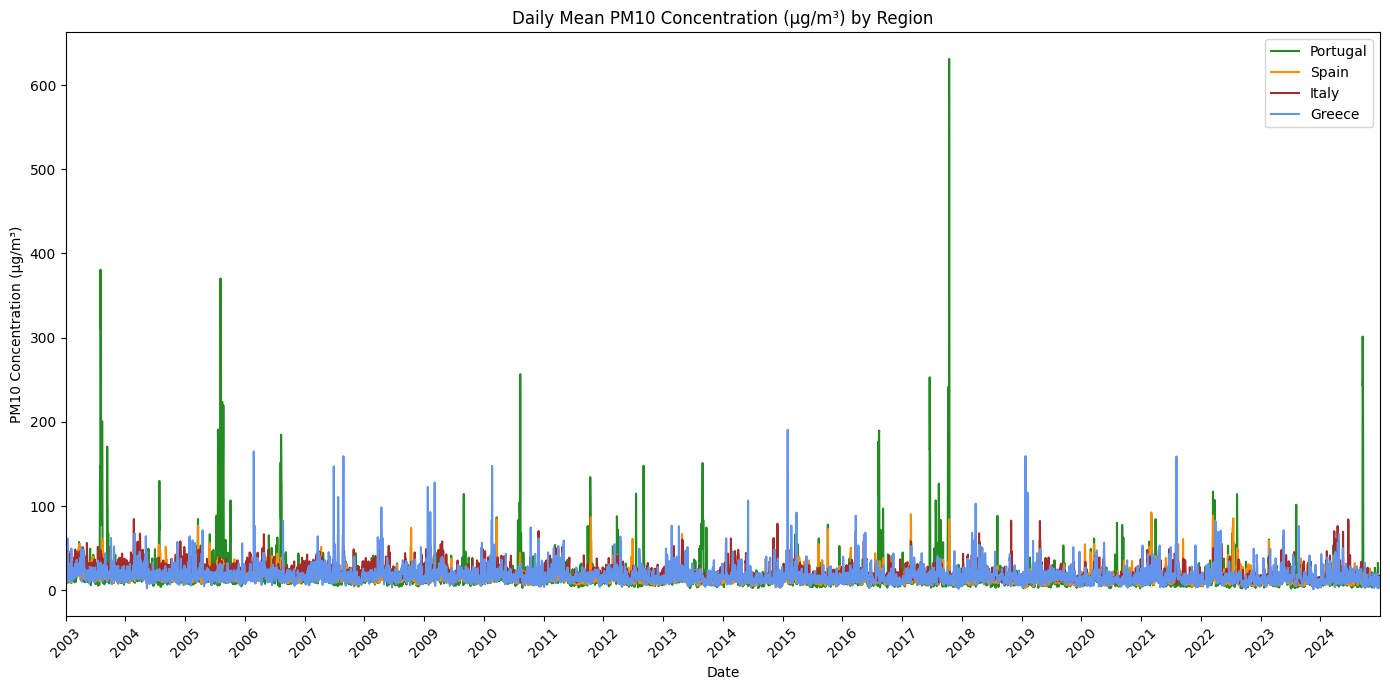

In [24]:
# Time series with daily averages by region (PM10)

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm10_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc" 
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM10 data and stack time ===
ds = xr.open_dataset(pm10_file) 
pm10 = ds["Mean"].stack(time=("Year", "Month", "Day"))  

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm10.sizes["time"]):
    y = int(pm10["Year"].values[i])
    m = int(pm10["Month"].values[i])
    d = int(pm10["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue  # skip invalid dates

# Filter to valid dates
pm10 = pm10.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    masked = pm10.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

plt.figure(figsize=(14, 7))

for region in mask_files:
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])

plt.title("Daily Mean PM10 Concentration (µg/m³) by Region") 
plt.xlabel("Date")
plt.ylabel("PM10 Concentration (µg/m³)") 
plt.legend()

# Format x-axis
plt.xlim(dates.min(), dates.max())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


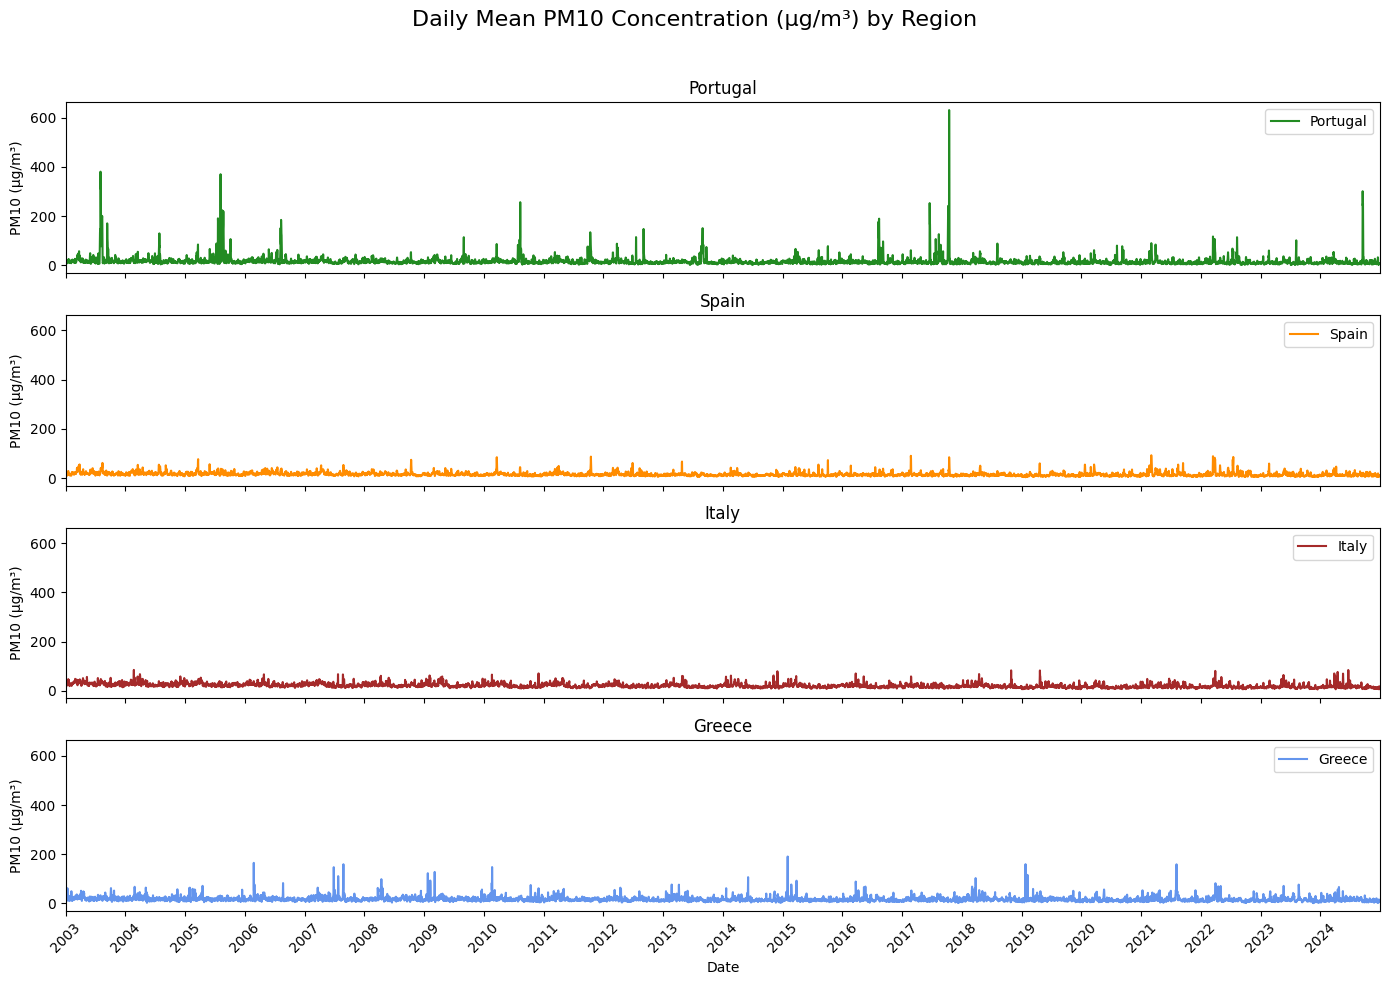

In [25]:
# Time series with daily averages by region (separated) for PM10

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm10_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"  
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM10 data and stack time ===
ds = xr.open_dataset(pm10_file) 
pm10 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm10.sizes["time"]):
    y = int(pm10["Year"].values[i])
    m = int(pm10["Month"].values[i])
    d = int(pm10["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Filter to valid dates
pm10 = pm10.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    masked = pm10.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One subplot per region, same y-axis ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

regions = list(mask_files.keys())
n_regions = len(regions)

fig, axes = plt.subplots(n_regions, 1, figsize=(14, 2.5 * n_regions), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    ax.plot(region_series[region].index, region_series[region],
            label=region, color=colors[region])
    ax.set_title(f"{region}")
    ax.set_ylabel("PM10 (µg/m³)") 
    ax.legend(loc="upper right")
    ax.grid(False)

# Format x-axis only on the last subplot
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator(1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axes[-1].set_xlim(dates.min(), dates.max())
plt.xticks(rotation=45)

plt.suptitle("Daily Mean PM10 Concentration (µg/m³) by Region", fontsize=16) 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


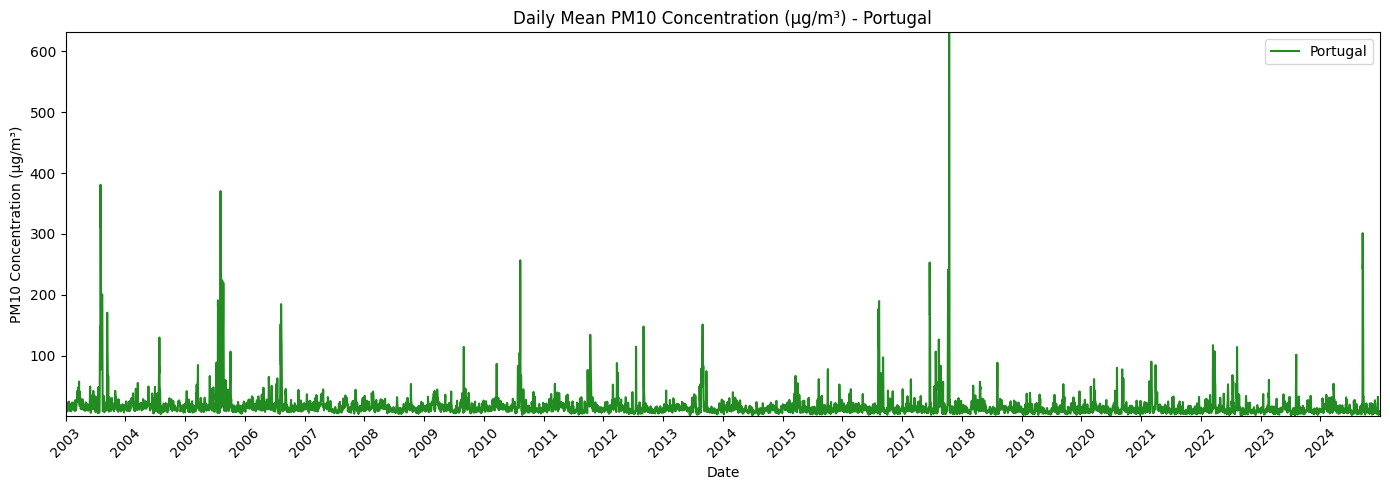

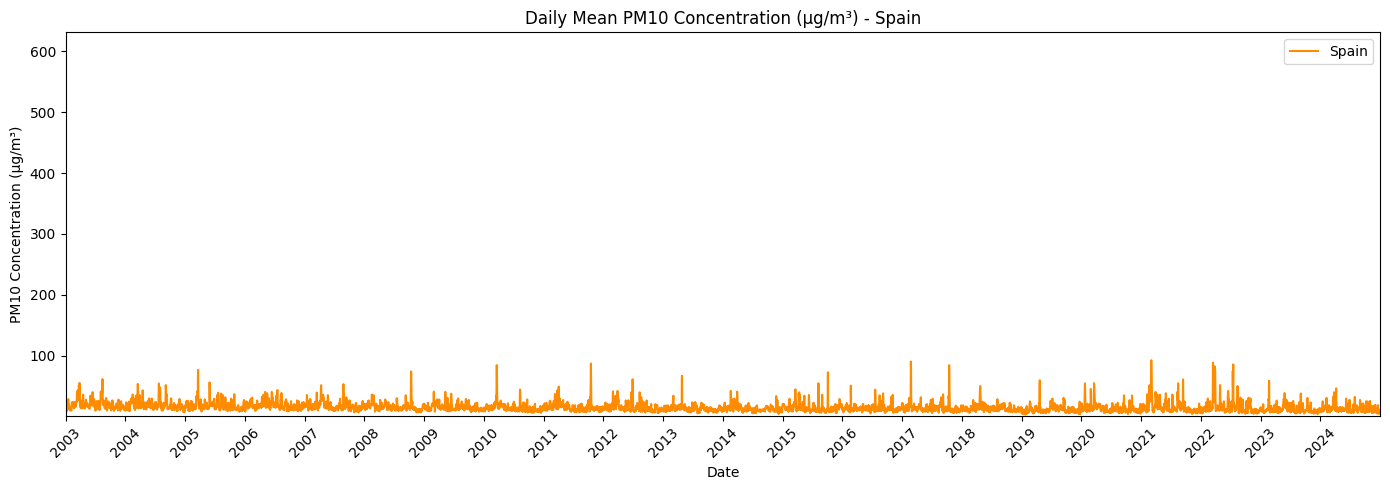

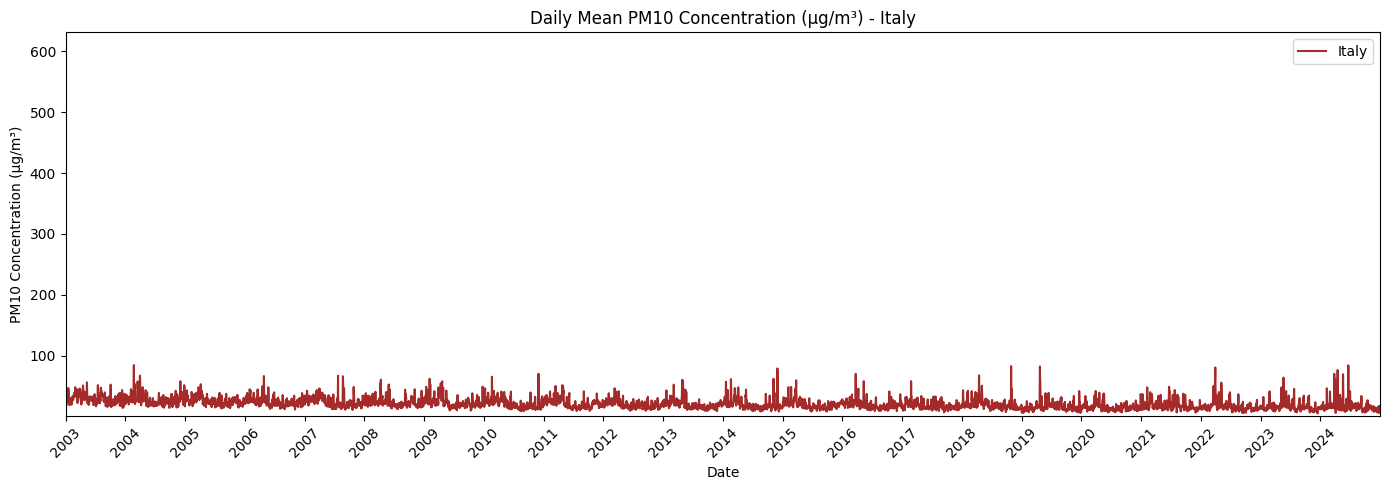

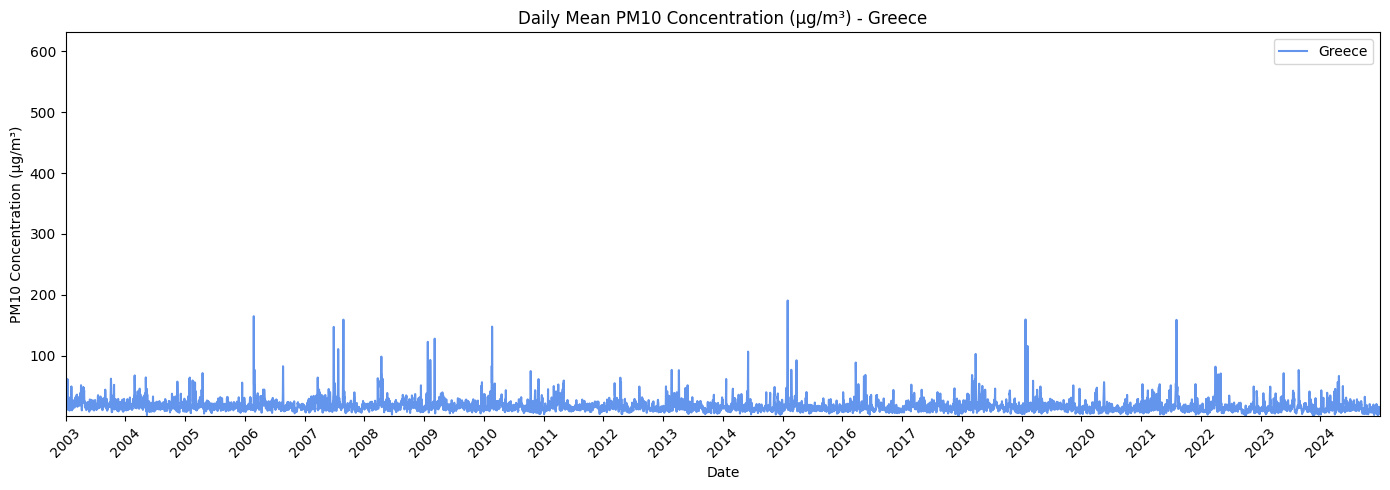

In [26]:
# Time series with daily averages by region (one plot per region) for PM10

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# === File paths ===
pm10_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc" 
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Load PM10 data and stack time ===
ds = xr.open_dataset(pm10_file) 
pm10 = ds["Mean"].stack(time=("Year", "Month", "Day")) 

# === Build datetime index safely ===
dates = []
valid_indices = []

for i in range(pm10.sizes["time"]):
    y = int(pm10["Year"].values[i])
    m = int(pm10["Month"].values[i])
    d = int(pm10["Day"].values[i])
    try:
        dt = pd.Timestamp(year=y, month=m, day=d)
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Filter to valid dates
pm10 = pm10.isel(time=valid_indices)
dates = pd.DatetimeIndex(dates)

# === Load region masks ===
masks = {}
for region, path in mask_files.items():
    mask_ds = xr.open_dataset(path)
    masks[region] = mask_ds["mask"] == 1  # Boolean mask

# === Compute regional time series ===
region_series = {}

for region, mask in masks.items():
    masked = pm10.where(mask)
    mean_series = masked.mean(dim=["latitude", "longitude"])
    region_series[region] = pd.Series(mean_series.values, index=dates)

# === Plotting: One figure per region, same y-axis ===

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# Determine common y-axis limits across all regions
all_values = pd.concat(region_series.values())
ymin, ymax = all_values.min(), all_values.max()

for region in mask_files:
    plt.figure(figsize=(14, 5))
    plt.plot(region_series[region].index, region_series[region],
             label=region, color=colors[region])
    
    plt.title(f"Daily Mean PM10 Concentration (µg/m³) - {region}")  
    plt.xlabel("Date")
    plt.ylabel("PM10 Concentration (µg/m³)")  
    plt.ylim(ymin, ymax)
    plt.legend()
    plt.grid(False)

    # Format x-axis
    plt.xlim(dates.min(), dates.max())
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


Common y-axis range: 0 to 65.08 µg/m³


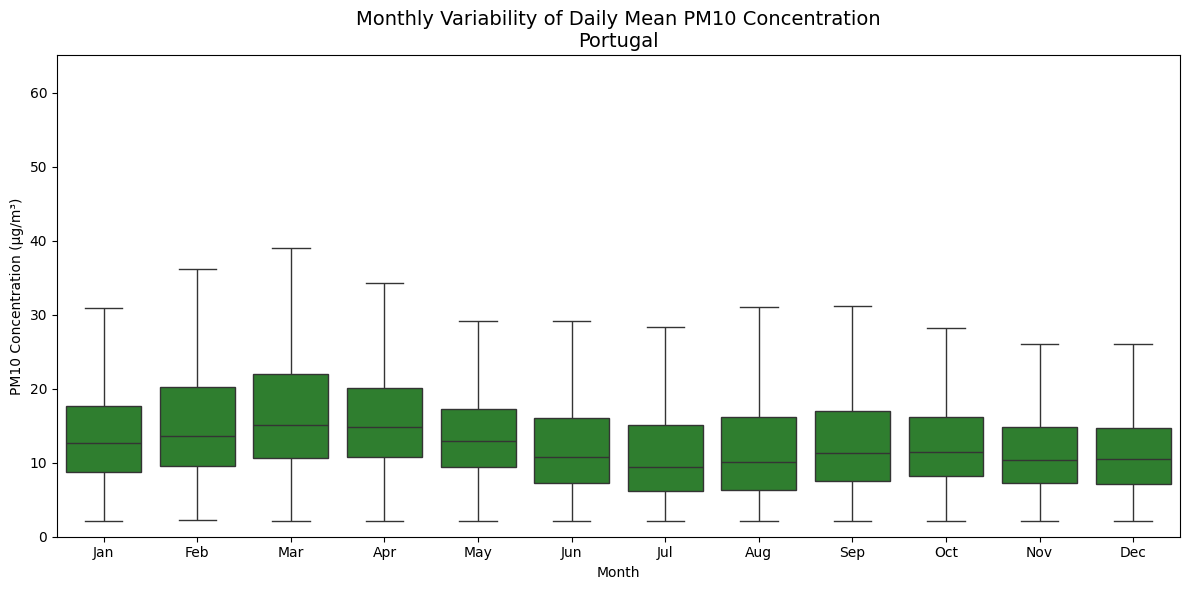

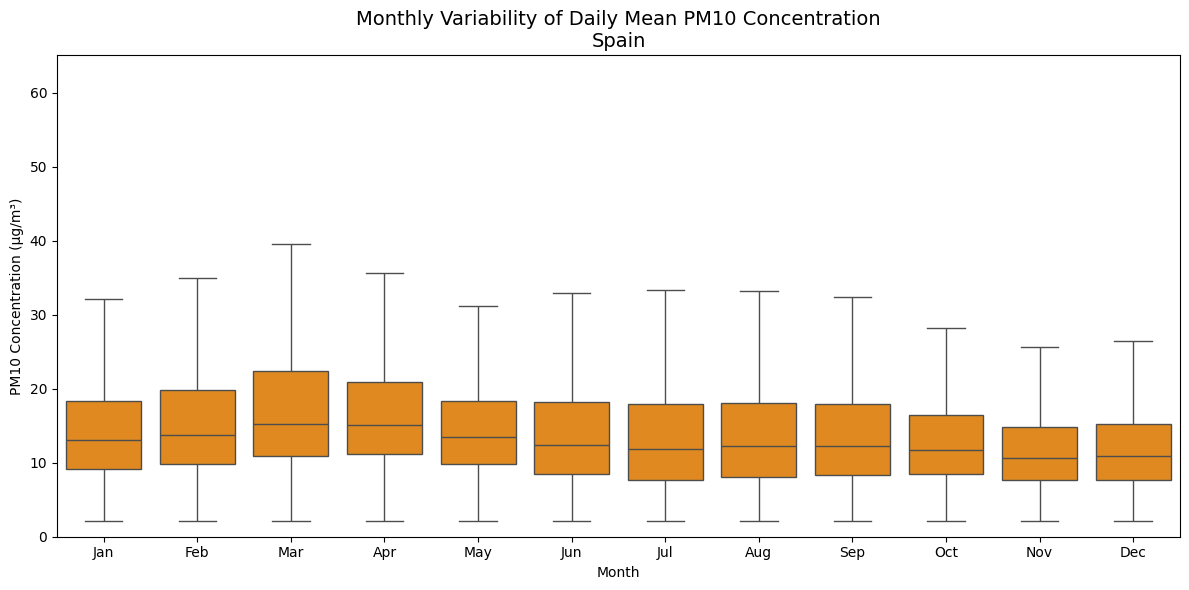

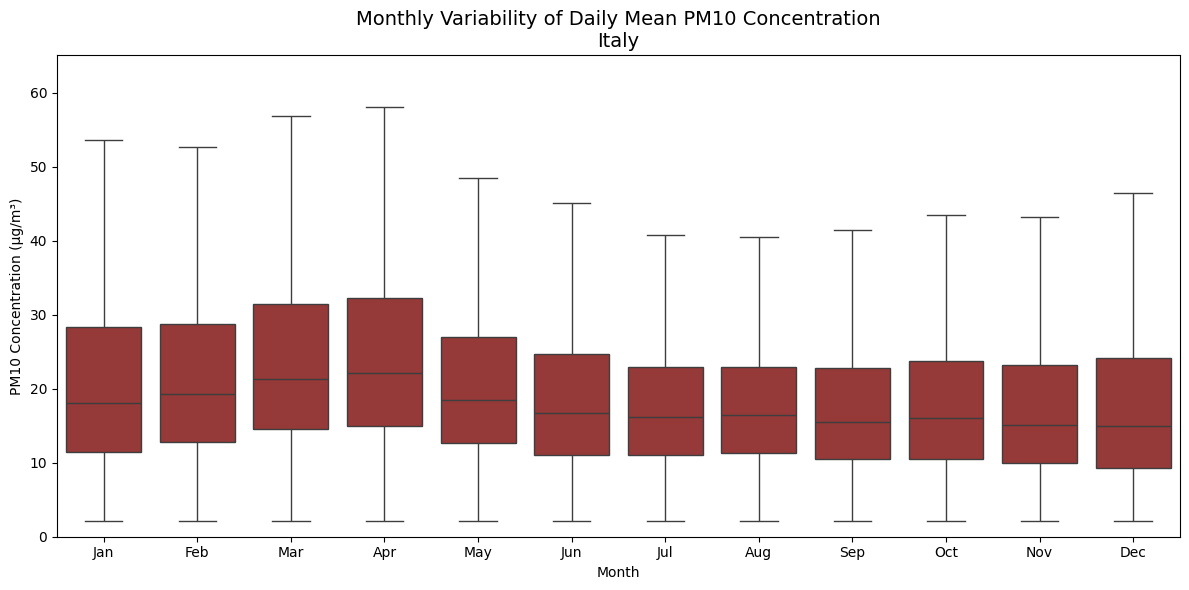

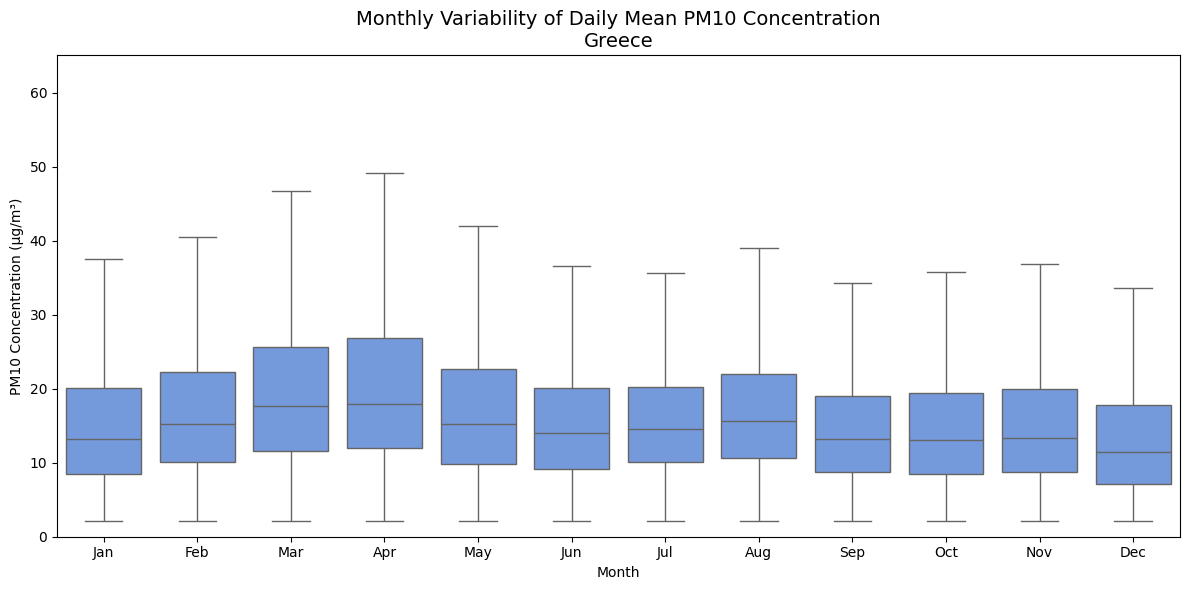

In [27]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
pm10_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# === Load PM10 data ===
ds = xr.open_dataset(pm10_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: determine global y-axis range (exclude extreme outliers) ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm10 = ds["Mean"].where(mask)
    pm10_stack = pm10.stack(space=("latitude", "longitude"))

    vals = pm10_stack.values.reshape(-1)
    vals = vals[~np.isnan(vals)]
    all_values.extend(vals)

# Filter global outliers
p1, p99 = np.percentile(all_values, [1, 99])
filtered_values = [v for v in all_values if p1 <= v <= p99]
y_min = 0
y_max = np.percentile(filtered_values, 99) * 1.15  # Padding

print(f"Common y-axis range: 0 to {y_max:.2f} µg/m³")

# === Second pass: plot each region separately ===
for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm10 = ds["Mean"].where(mask)
    pm10_stack = pm10.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        month_data = pm10_stack.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]

        # Apply global outlier filtering
        flat = flat[(flat >= p1) & (flat <= p99)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region])
    plt.ylim(y_min, y_max)
    plt.title(f"Monthly Variability of Daily Mean PM10 Concentration\n{region}", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("PM10 Concentration (µg/m³)")
    plt.tight_layout()
    plt.show()


Common y-axis range: 0 to 65.08 µg/m³


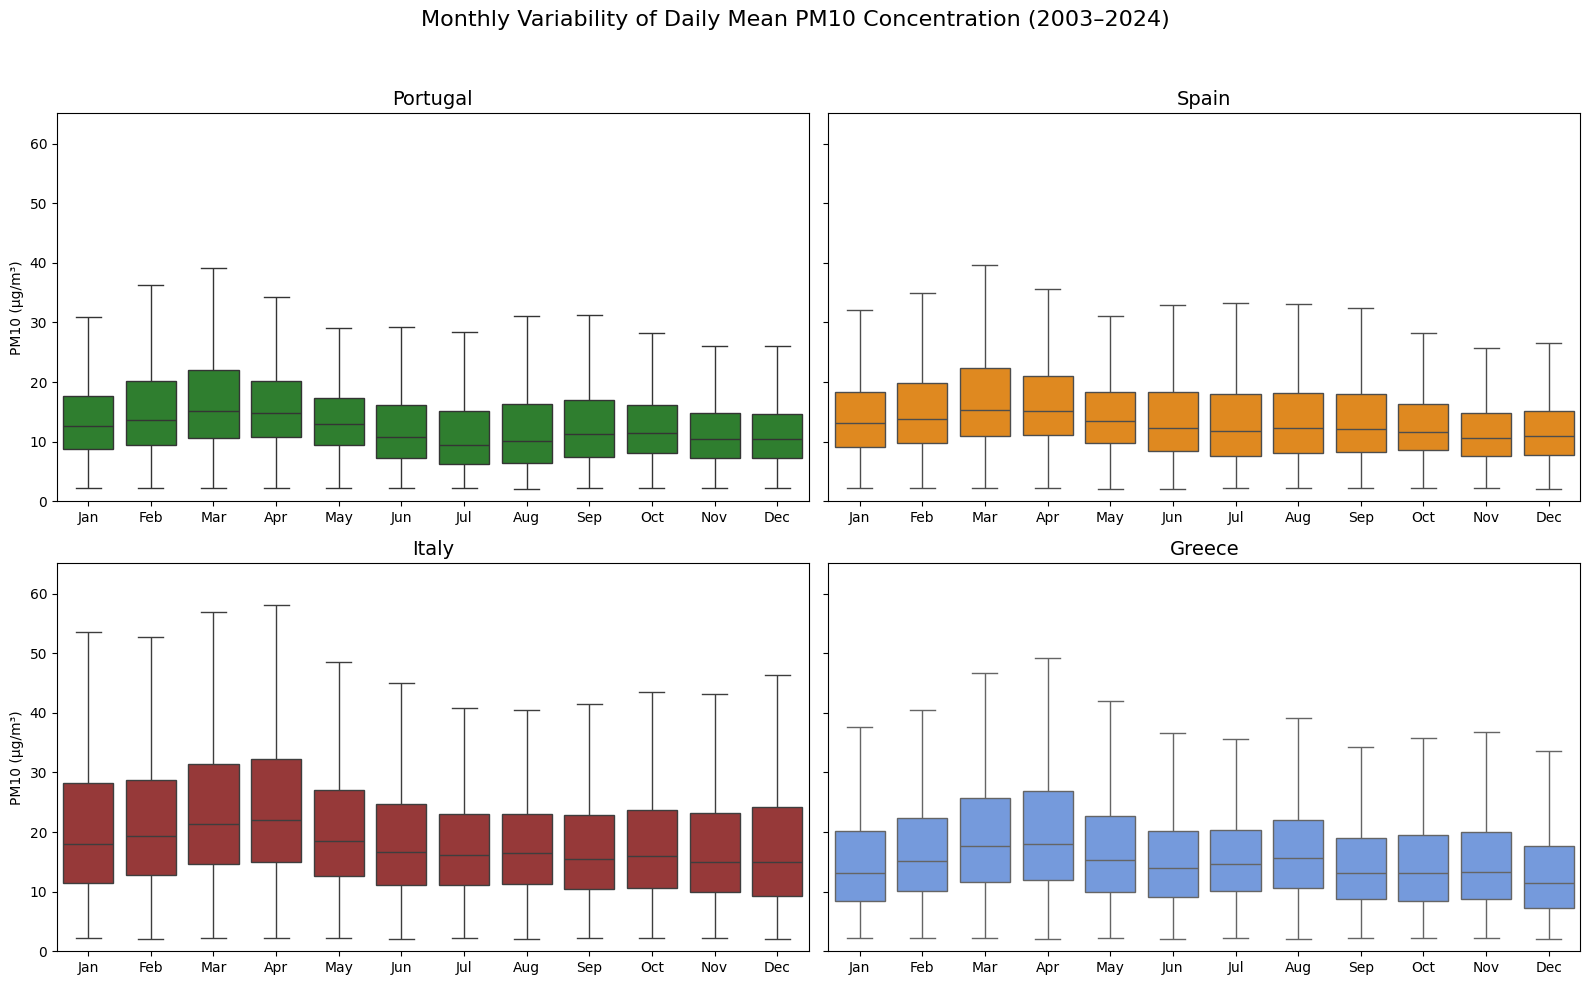

In [28]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === File paths ===
pm10_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# === Region colors for plotting ===
colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown"
}

# === Load PM10 data ===
ds = xr.open_dataset(pm10_file)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# === First pass: determine global y-axis range (exclude extreme outliers) ===
all_values = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm10 = ds["Mean"].where(mask)
    pm10_stack = pm10.stack(space=("latitude", "longitude"))

    vals = pm10_stack.values.reshape(-1)
    vals = vals[~np.isnan(vals)]
    all_values.extend(vals)

# Filter global outliers
p1, p99 = np.percentile(all_values, [1, 99])
filtered_values = [v for v in all_values if p1 <= v <= p99]
y_min = 0
y_max = np.percentile(filtered_values, 99) * 1.15  # Padding

print(f"Common y-axis range: 0 to {y_max:.2f} µg/m³")

# === Second pass: plot all regions in a single figure ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, (region, mask_path) in enumerate(mask_files.items()):
    mask = xr.open_dataset(mask_path)["mask"] == 1
    pm10 = ds["Mean"].where(mask)
    pm10_stack = pm10.stack(space=("latitude", "longitude"))

    all_data = []

    for month in range(1, 13):
        month_data = pm10_stack.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]

        # Apply global outlier filtering
        flat = flat[(flat >= p1) & (flat <= p99)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5,
                color=colors[region], ax=axes[i])
    axes[i].set_title(region, fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("PM10 (µg/m³)" if i % 2 == 0 else "")
    axes[i].set_ylim(y_min, y_max)

# Final layout
fig.suptitle("Monthly Variability of Daily Mean PM10 Concentration (2003–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [29]:
# Exceedances of PM10 daily mean > 45 µg/m³

import xarray as xr
import numpy as np
import pandas as pd
import os

# === File paths ===
pm10_file = r"D:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"  
mask_dir = r"D:\IPMA\Countries"

mask_files = {
    "Portugal": os.path.join(mask_dir, "Portugal_mask.nc"),
    "Spain": os.path.join(mask_dir, "Spain_mask.nc"),
    "Italy": os.path.join(mask_dir, "Italy_mask.nc"),
    "Greece": os.path.join(mask_dir, "Greece_mask.nc"),
}

# Load dataset
ds = xr.open_dataset(pm10_file) 

threshold = 45.0  # µg/m³ for PM10 

results = []

for region, mask_path in mask_files.items():
    mask = xr.open_dataset(mask_path)["mask"] == 1

    pm10 = ds["Mean"].where(mask) 

    # Calculate spatial average daily mean PM10
    regional_mean = pm10.mean(dim=["latitude", "longitude"], skipna=True)

    df = regional_mean.to_dataframe(name="PM10_mean").reset_index() 
    df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors='coerce')
    df = df.dropna(subset=["Date"])

    counts = df[df["PM10_mean"] > threshold].groupby("Year").size().reset_index(name="DaysAbove45")  
    counts["Region"] = region

    results.append(counts)

df_counts = pd.concat(results, ignore_index=True)

# Create pivot table: rows=Year, columns=Region
table = df_counts.pivot(index="Year", columns="Region", values="DaysAbove45").fillna(0).astype(int) 
table.loc["Total"] = table.sum(numeric_only=True)

# Print nicely
print("\nNumber of days per year where daily mean PM10 concentration exceeds 45 µg/m³:\n")
print(table) 



Number of days per year where daily mean PM10 concentration exceeds 45 µg/m³:

Region  Greece  Italy  Portugal  Spain
Year                                  
2003        10     12        29      4
2004         8     21         9      6
2005         9      3        41      4
2006         6      6        21      0
2007        14      9         0      3
2008        12      4         2      3
2009         9     13         3      0
2010         9      4        14      4
2011         8      5        13      4
2012         4      1        13      1
2013         6      7        19      2
2014         5     14         0      0
2015         7      5         7      2
2016         7      4        13      1
2017         3      2        27      5
2018        13      6         7      3
2019         8      5         1      2
2020         3      0         7      7
2021        15      2         9      9
2022        10      7        19     19
2023         6      4         4      1
2024         6      9  